In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
import random
from multiprocessing import Process, Queue
queue = Queue()
import csv

In [ ]:
redd_dfs={}

In [ ]:
def read_df(file_title):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df)
    except:
        return(None)

In [ ]:
for i in [1,2,3,5,6]:
    redd_dfs[i]=read_df("drive/MyDrive/Resampled_Redd/house_"+str(i)+".csv")

In [ ]:
def redd_house(house_nb):
    return(redd_dfs[house_nb])

In [ ]:
Redd_min_durations={1:30,2:30,3:30,5:12,6:120}

In [ ]:
def find_activations(dataframe,house_nb,min_durations,threshold=20):
  on_consumption=[]
  flag=False 
  min_duration=Redd_min_durations[house_nb]
  for index in dataframe.index[0:]:
     current_pow = dataframe.consumption[index]
     if (current_pow>=threshold) and (flag==False):
      start=index
      flag=True
     elif ((current_pow<=(threshold)) and (flag==True)):
       end=index-1
       if (end-start)>=min_duration:
        on_consumption.append((start,end))
       flag=False
  return(on_consumption)

In [ ]:
def add_margin(activation_list,last_index,margin=2):
  on_consumptions=[]
  for activation_tuple in activation_list:
    if (int(int(activation_tuple[0])-margin)>=0):
      start=(activation_tuple[0])-margin
    else:
      start=0
    if ((activation_tuple[1]+margin)<=last_index):
      end=activation_tuple[1]+margin
    else:
      end=last_index
    on_consumptions.append((start,end))
  return(on_consumptions)

In [ ]:
def activation_duration(df,on_consumption):
  activation_durations=[]
  for i in on_consumption:
    activation_time=round((i[1]-i[0])/6)
    activation_durations.append(activation_time)
  return(activation_durations)

In [ ]:
def get_activation_consumption_average(dataframe,activation_list):
  activation_average_list=[]
  for activation in activation_list:
    start=activation[0]
    end=activation[1]
    current_activation=dataframe.consumption.iloc[start:end]
    average=sum(current_activation)/len(current_activation)
    activation_average_list.append(average)
  return(activation_average_list)

In [ ]:
def get_activation_max(dataframe,activation_list):
  list_of_maximums=[]
  for activation in activation_list:
    start=activation[0]
    end=activation[1]
    list_of_maximums.append(max(dataframe.consumption.iloc[start:end]))
  return(list_of_maximums)

In [ ]:
Redd_on_consumptions_with_margin={}
Redd_on_durations_with_margin={}

In [ ]:
for i in [1,2,3,5,6]:
  on_consumptions= find_activations(redd_house(i),i,Redd_min_durations,20)
  Redd_on_consumptions_with_margin[i]=add_margin(on_consumptions,len(redd_dfs[i].index))

In [ ]:
for i in [1,2,3,5,6]:
  activation_list= activation_duration(redd_house(i),Redd_on_consumptions_with_margin[i])
  Redd_on_durations_with_margin[i]=activation_list
  print(activation_list)

[26, 37, 17, 14, 14, 19, 17, 20, 18, 22, 18, 25, 18, 15, 16, 14, 15, 14, 18, 17, 16, 16, 16, 14, 16, 14, 15, 16, 15, 16, 15, 14, 14, 14, 25, 35, 18, 14, 14, 15, 15, 16, 14, 15, 14, 14, 14, 15, 14, 15, 16, 15, 15, 15, 16, 14, 15, 15, 14, 14, 14, 15, 14, 15, 15, 15, 15, 15, 15, 15, 17, 15, 37, 17, 14, 14, 14, 13, 14, 12, 16, 14, 14, 15, 14, 15, 14, 16, 14, 15, 16, 14, 15, 16, 14, 16, 14, 15, 14, 15, 14, 15, 16, 15, 24, 14, 20, 14, 40, 44, 26, 24, 23, 23, 23, 22, 22, 26, 24, 26, 36, 30, 19, 34, 34, 33, 28, 24, 24, 23, 28, 43, 24, 21, 24, 23, 22, 18, 24, 20, 27, 21, 22, 20, 21, 20, 20, 19, 19, 19, 25, 30, 20, 28, 20, 26, 21, 45, 25, 24, 23, 23, 20, 22, 22, 22, 24, 23, 24, 24, 25, 25, 25, 24, 24, 24, 24, 23, 24, 19, 34, 42, 24, 23, 23, 22, 22, 26, 27, 24, 28, 22, 23, 22, 22, 22, 19, 18, 20, 19, 19, 19, 19, 19, 20, 20, 34, 39, 24, 20, 21, 20, 20, 19, 24, 24, 21, 21, 16, 20, 16, 22, 20, 22, 19, 19, 18, 18, 18, 17, 16, 16, 13, 18, 14, 18, 25, 36, 20, 18, 19, 19, 20, 20, 20, 20, 19, 19, 18, 19,

In [ ]:
Redd_ON_durations_list_with_margins=[]
for i in [1,2,3,5,6]:
  Redd_ON_durations_list_with_margins.append(Redd_on_durations_with_margin[i])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


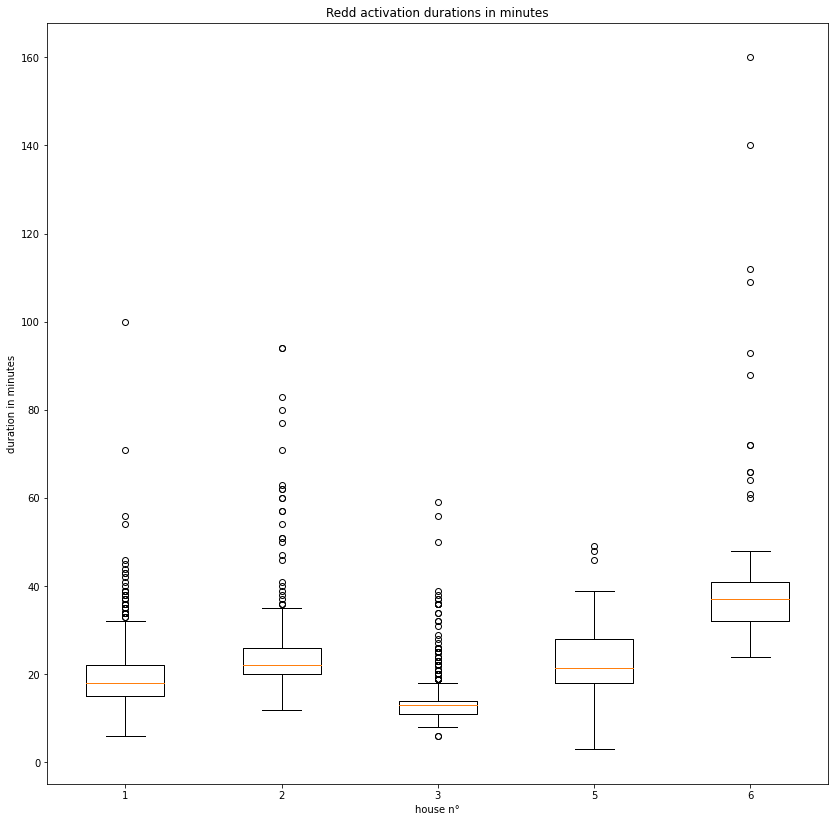

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd activation durations in minutes')
ax7.boxplot(Redd_ON_durations_list_with_margins)
#ax7.set_ylim(0,200)
ax7.set_xticklabels(Redd_min_durations.keys())
plt.savefig('Redd activation durations in minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

In [ ]:
redd_duration_thresholds={1:38,2:40,3:25,5:40,6:50}

In [ ]:
activation_number_per_house=[]
for i in [1,2,3,5,6]:
  activation_number_per_house.append(len(Redd_on_consumptions_with_margin[i]))

In [ ]:
print(activation_number_per_house)

[645, 356, 714, 94, 270]


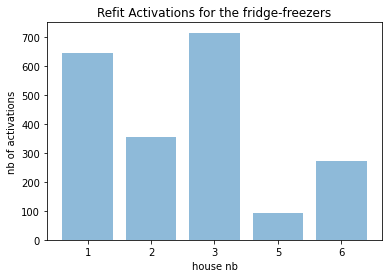

In [ ]:
y_pos = np.arange (5)
plt.bar(y_pos,activation_number_per_house, align='center', alpha=0.5)
plt.xticks(y_pos, Redd_on_consumptions_with_margin.keys())
plt.ylabel('nb of activations')
plt.xlabel('house nb')
plt.title('Refit Activations for the fridge-freezers')
plt.show()

In [ ]:
redd_average_power_consumption_per_house=[]

In [ ]:
for i in [1,2,3,5,6]:
  redd_average_power_consumption_per_house.append(get_activation_consumption_average(redd_dfs[i],Redd_on_consumptions_with_margin[i]))

In [ ]:
redd_maximum_consumption_per_activation=[]

In [ ]:
for i in [1,2,3,5,6]:
  redd_maximum_consumption_per_activation.append(get_activation_max(redd_dfs[i],Redd_on_consumptions_with_margin[i]))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


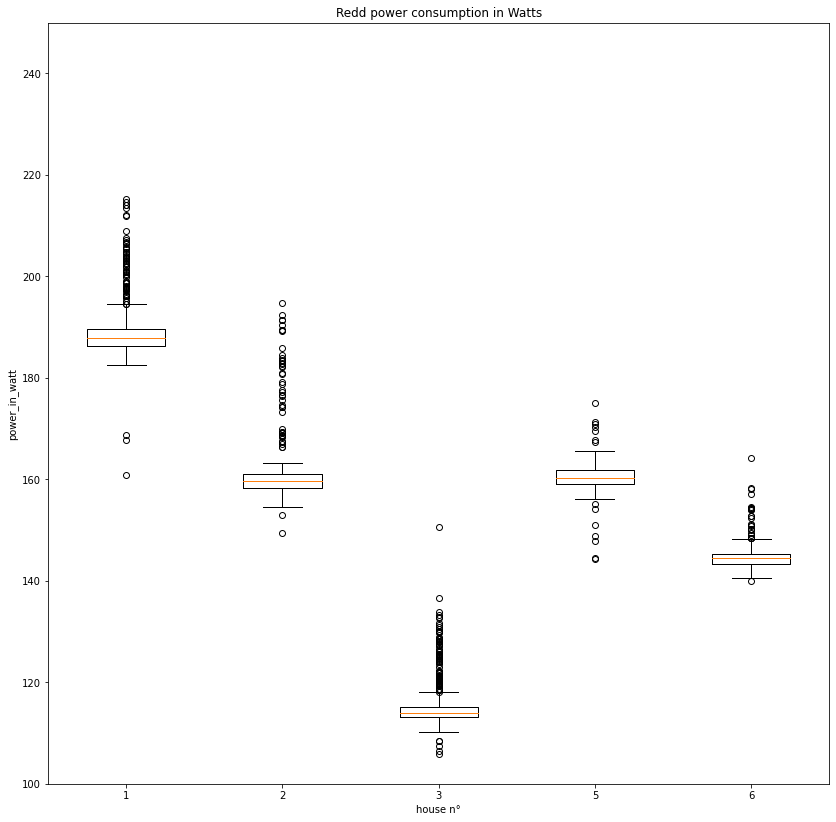

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd power consumption in Watts')
ax7.boxplot(redd_average_power_consumption_per_house)
ax7.set_ylim(100,250)
ax7.set_xticklabels(Redd_min_durations.keys())
plt.savefig('Redd power consumption in watt.jpg',dpi=184)
plt.ylabel("power_in_watt")
plt.xlabel("house n°")
plt.show()

In [ ]:
redd_average_power_consumption_thresholds={1:200,2:169,3:125,5:171,6:155}
redd_minimum_average_power_consumption_thresholds={1:180,2:152,3:109,5:153,6:139}

In [ ]:
for i in [1,2,3,5,6]:
  activations=Redd_on_consumptions_with_margin[i]
  new_activations=[]
  df=redd_dfs[i]
  Redd_on_consumptions_with_margin[i]=[]
  min=redd_minimum_average_power_consumption_thresholds[i]
  for activation in activations:
    start=activation[0]
    end=activation[1]
    average=sum(df.consumption.iloc[start:end])/len(df.consumption.iloc[start:end])
    if min < average :
      new_activations.append(activation)
  Redd_on_consumptions_with_margin[i]=new_activations


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


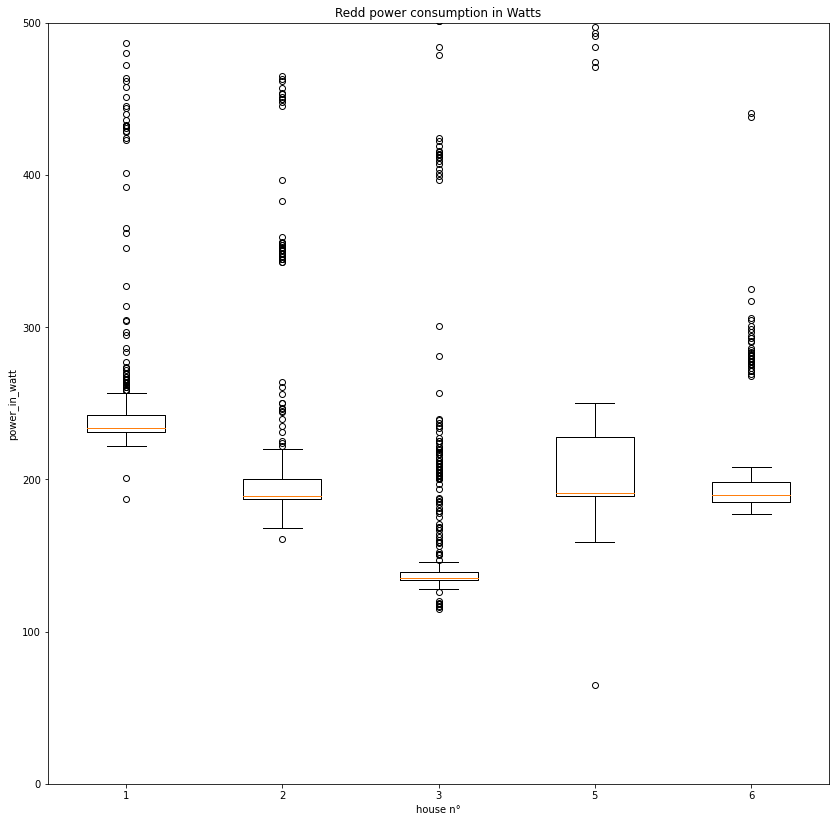

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd power consumption in Watts')
ax7.boxplot(redd_maximum_consumption_per_activation)
ax7.set_ylim(0,500)
ax7.set_xticklabels(Redd_min_durations.keys())
plt.savefig('Redd power consumption in watt.jpg',dpi=184)
plt.ylabel("power_in_watt")
plt.xlabel("house n°")
plt.show()

In [ ]:
redd_max_anomaly_thresholds={1:315,2:300,3:200,5:250,6:250}

In [ ]:
def find_house_power_consumption(dataframe,list_of_activations):
  power_consumption_list=[]
  for activation in list_of_activations:
    start=activation[0]
    end=activation[1]
    power_consumption_list.append(dataframe.consumption.iloc[start:end+1])
  return(power_consumption_list)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


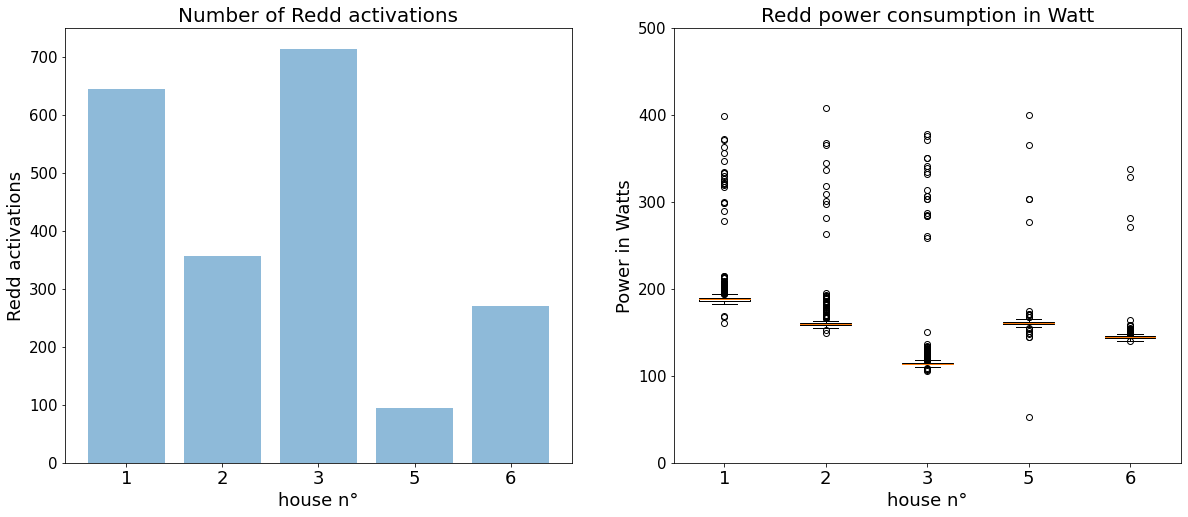

In [ ]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(5)
ax1.bar(y_pos,activation_number_per_house, align='center', alpha=0.5)
ax1.set_title('Number of Redd activations',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Redd activations', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([1,2,3,5,6],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5]))

ax7.set_title('Redd power consumption in Watt',fontsize=20)
ax7.boxplot(redd_average_power_consumption_per_house,vert=True)
ax7.set_ylim(0,500)
ax7.set_xticklabels(redd_dfs.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Power in Watts', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)


plt.savefig('Number_consumption_redd.jpg',dpi=184)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


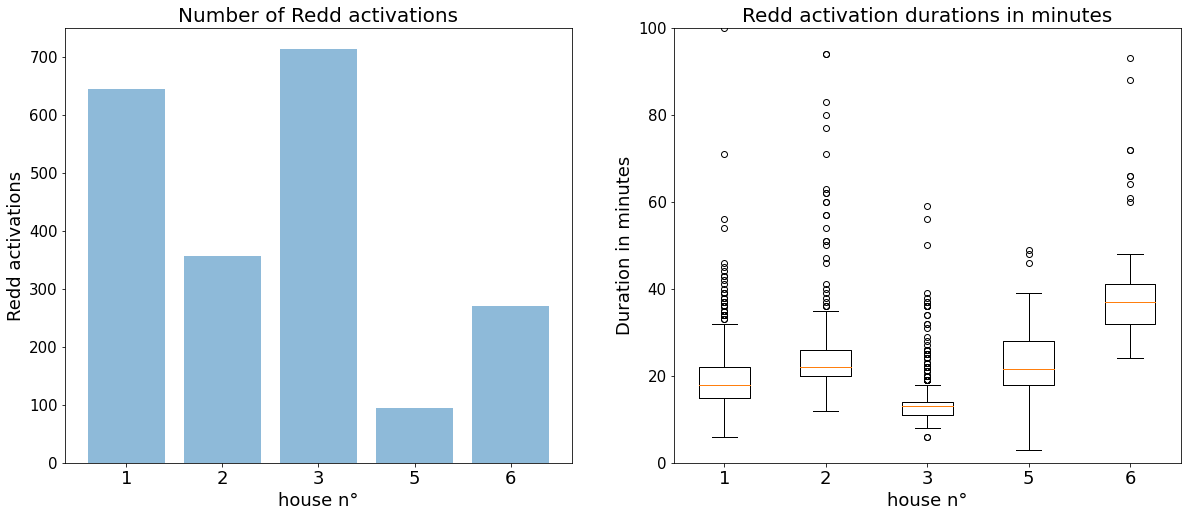

In [ ]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(5)
ax1.bar(y_pos,activation_number_per_house, align='center', alpha=0.5)
ax1.set_title('Number of Redd activations',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Redd activations', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([1,2,3,5,6],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5]))

ax7.set_title('Redd activation durations in minutes',fontsize=20)
ax7.boxplot(Redd_ON_durations_list_with_margins,vert=True)
ax7.set_ylim(0,100)
ax7.set_xticklabels(redd_dfs.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Duration in minutes', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)


plt.savefig('Number_durations_redd.jpg',dpi=184)
plt.show()

In [ ]:
def get_max_anomaly(activation,house_nb):
  dataframe=redd_dfs[house_nb]
  anomaly = False
  start=activation[0]
  end=activation[1]
  maximum=max(dataframe.consumption.iloc[start:end])
  if (maximum>redd_max_anomaly_thresholds[house_nb]):
    anomaly= True
  return(anomaly)

In [ ]:
def get_average_anomaly(activation,house_nb):
  dataframe=redd_dfs[house_nb]
  anomaly = False
  start=activation[0]
  end=activation[1]
  average=sum(dataframe.consumption.iloc[start:end])/len(dataframe.consumption.iloc[start:end])
  if (average>redd_average_power_consumption_thresholds[house_nb]):
    anomaly= True
  return(anomaly)

In [ ]:
redd_activations_normal_consumption={}
redd_activations_abnormal_consumption={}

In [ ]:
for i in [1,2,3,5,6]:
  house_normal_activations=[]
  house_abnormal_activations=[]
  house_activations=Redd_on_consumptions_with_margin[i]
  for activation in house_activations:
    if (get_max_anomaly(activation,i) or get_average_anomaly(activation,i)):
      house_abnormal_activations.append(activation)
    else:
      house_normal_activations.append(activation)
  redd_activations_normal_consumption[i]=house_normal_activations
  redd_activations_abnormal_consumption[i]=house_abnormal_activations

House1number of normal activations:550number of anomalies92
House2number of normal activations:303number of anomalies52
House3number of normal activations:571number of anomalies138
House5number of normal activations:76number of anomalies12
House6number of normal activations:221number of anomalies49


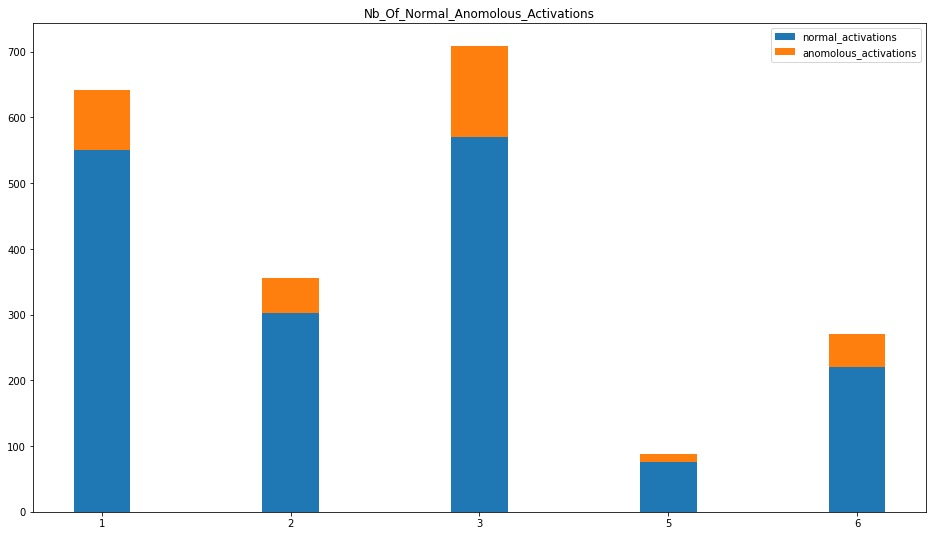

In [ ]:
nb_normal_activations=[]
nb_anomolous_activations=[]
for i in [1,2,3,5,6]:
    nb_normal_activations.append(len(redd_activations_normal_consumption[i]))
    nb_anomolous_activations.append(len(redd_activations_abnormal_consumption[i]))
    print("House"+str(i)+"number of normal activations:"+str(len(redd_activations_normal_consumption[i]))+"number of anomalies"+str(len(redd_activations_abnormal_consumption[i])))
fig, ax = plt.subplots(figsize =(16, 9))
width =0.3
y_pos = np.arange(5)
ax.bar(np.arange(len(nb_normal_activations)), nb_normal_activations, width=width,label='normal_activations')
ax.bar(np.arange(len(nb_anomolous_activations)), nb_anomolous_activations,bottom=nb_normal_activations, width=width,label="anomolous_activations")
plt.xticks(y_pos, [1,2,3,5,6])
plt.title('Nb_Of_Normal_Anomolous_Activations')
plt.legend()
plt.show()

In [ ]:
def get_duration_anomaly(activation,house_nb):
  dataframe=redd_dfs[house_nb]
  anomaly = False
  start=activation[0]
  end=activation[1]
  duration=round((end-start)/6)
  if (duration>redd_duration_thresholds[house_nb]):
    anomaly= True
  return(anomaly)

In [ ]:
redd_duration_normal_behavior={}

In [ ]:
for i in [1,2,3,5,6]:
  normal_behavior_list=[]
  activation_list=Redd_on_consumptions_with_margin[i]
  for activation in activation_list:
    if not (get_duration_anomaly(activation,i)):
      normal_behavior_list.append(activation)
  redd_duration_normal_behavior[i]=normal_behavior_list


In [ ]:
redd_duration_abnormal_behavior={}

In [ ]:
for i in [1,2,3,5,6]:
  abnormal_behavior_list=[]
  activation_list=Redd_on_consumptions_with_margin[i]
  for activation in activation_list:
    if (get_duration_anomaly(activation,i)):
      abnormal_behavior_list.append(activation)
  redd_duration_abnormal_behavior[i]=abnormal_behavior_list


In [ ]:
def find_max_average(df, beginning, end):
  average= sum(df.consumption.iloc[beginning:end])/len(df.iloc[beginning:end])
  maximum=(max(df.consumption.iloc[beginning:end]))
  return((average,maximum))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

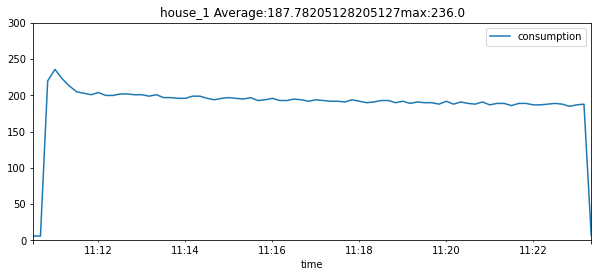

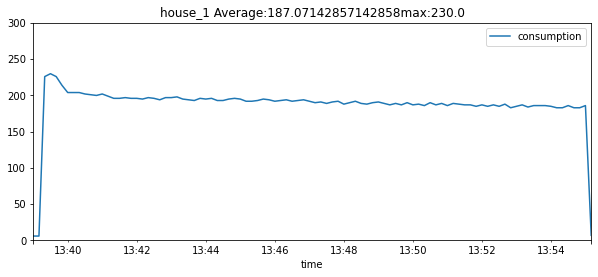

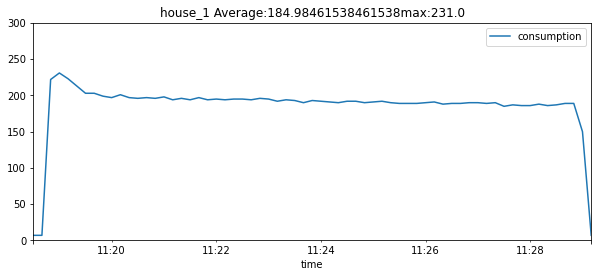

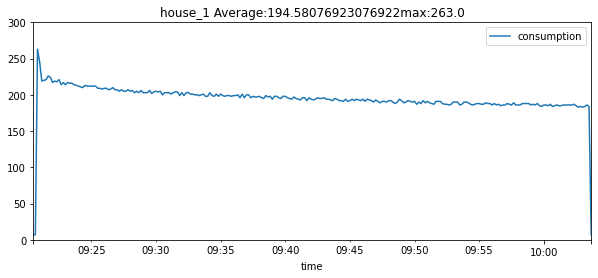

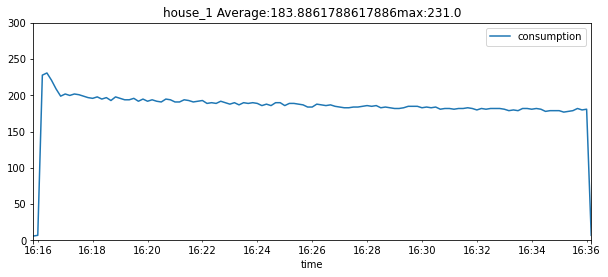

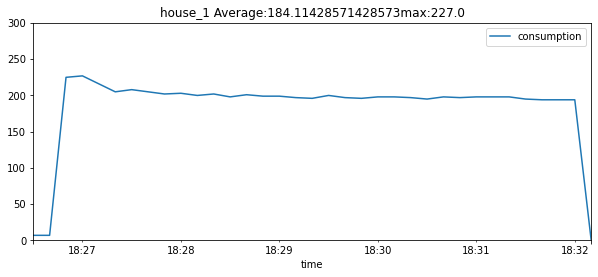

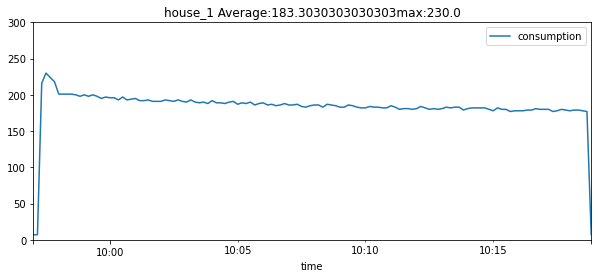

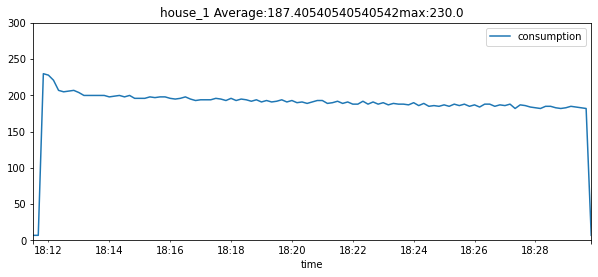

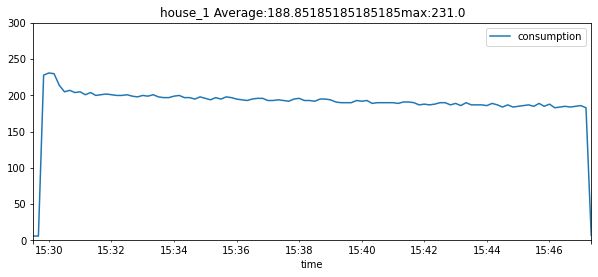

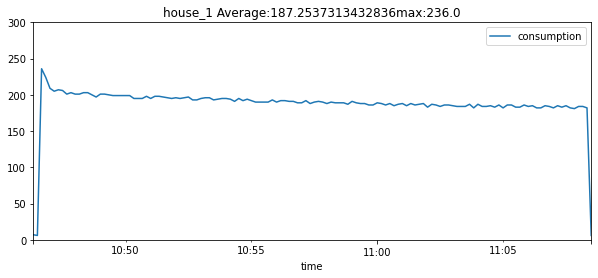

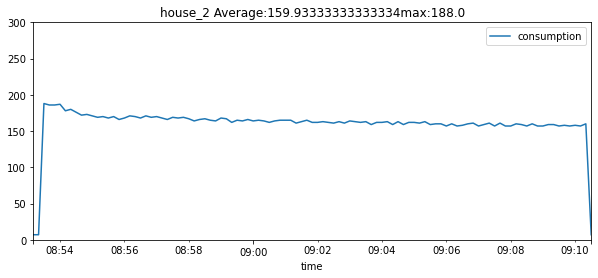

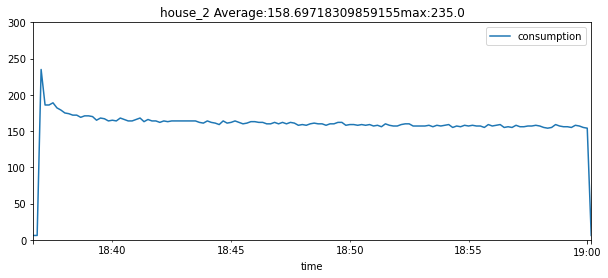

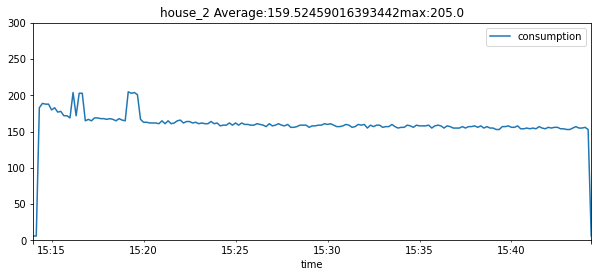

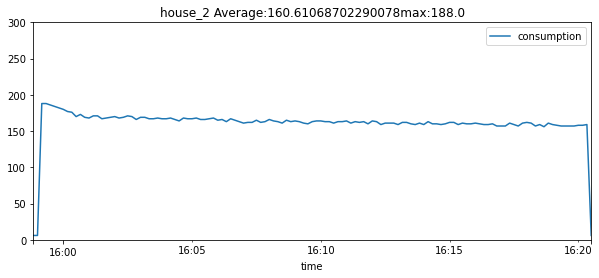

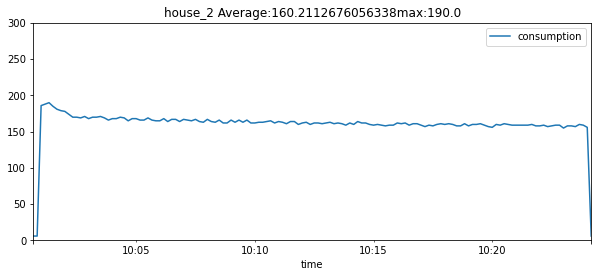

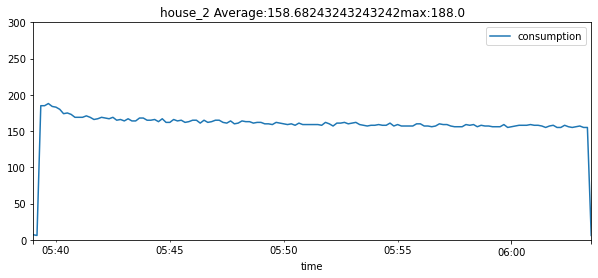

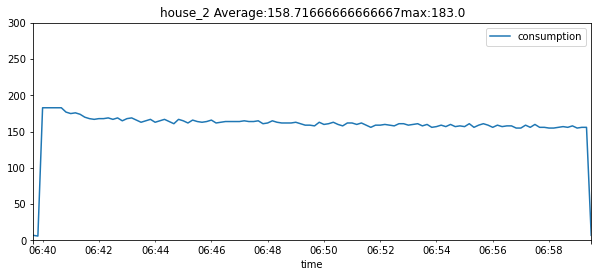

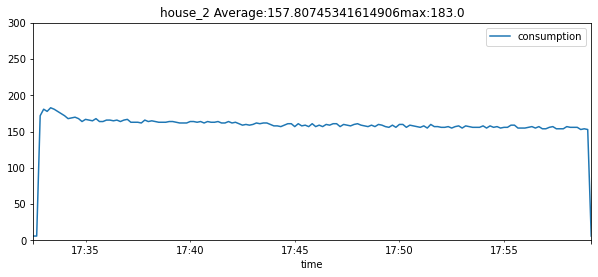

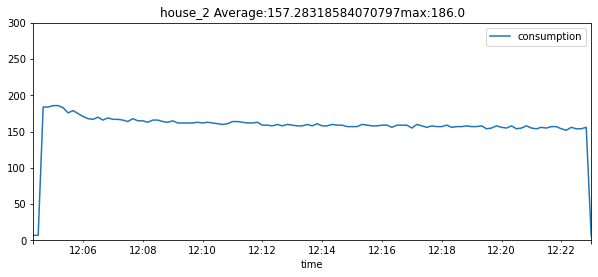

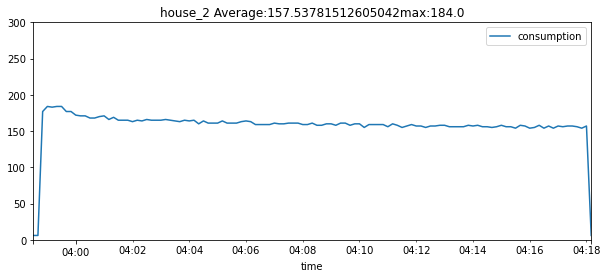

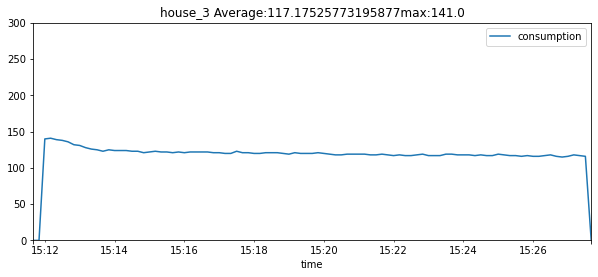

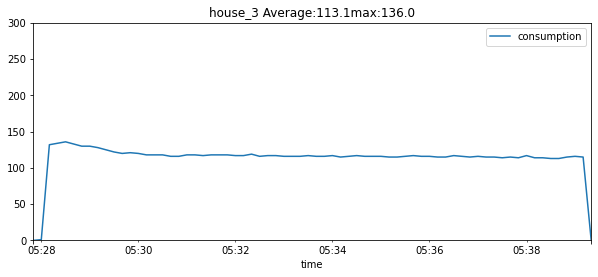

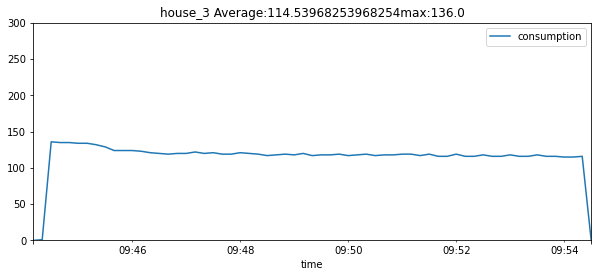

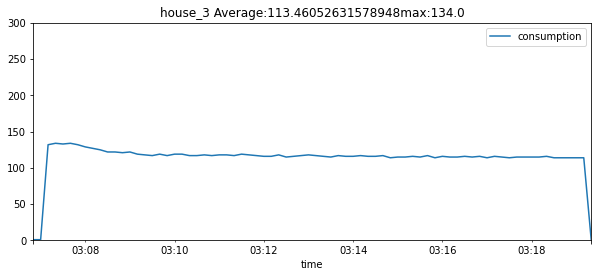

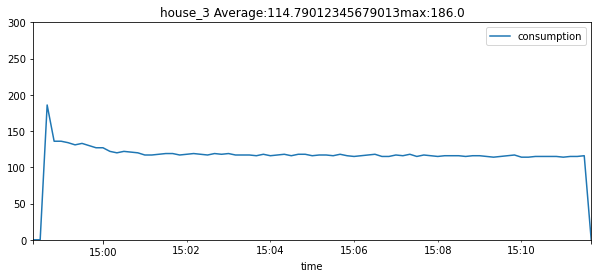

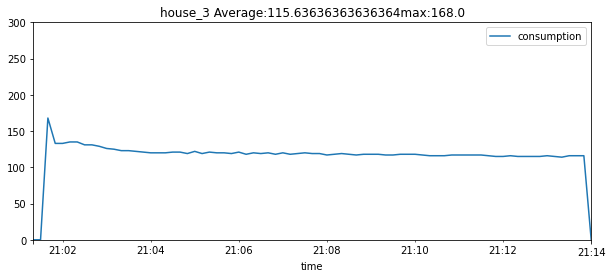

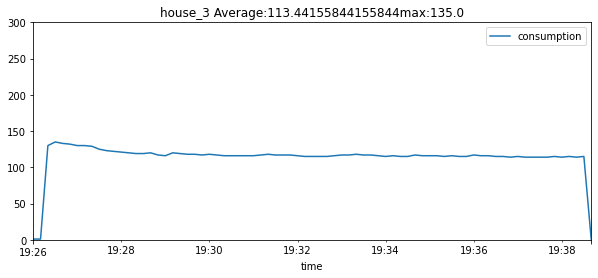

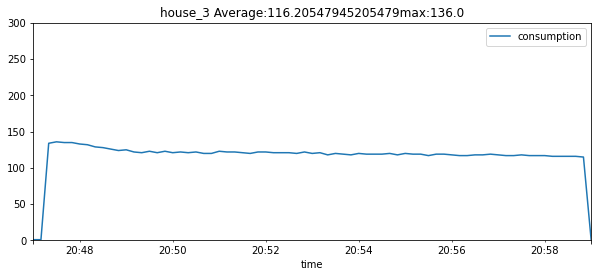

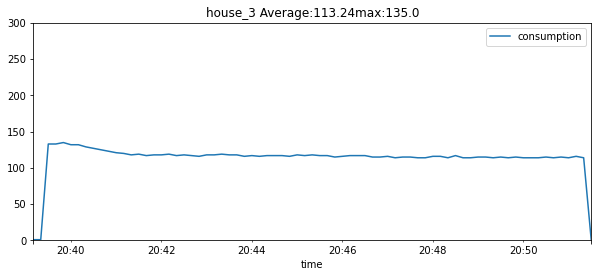

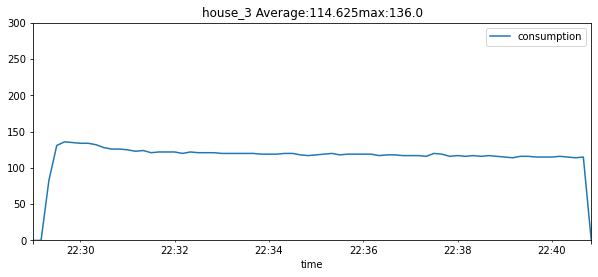

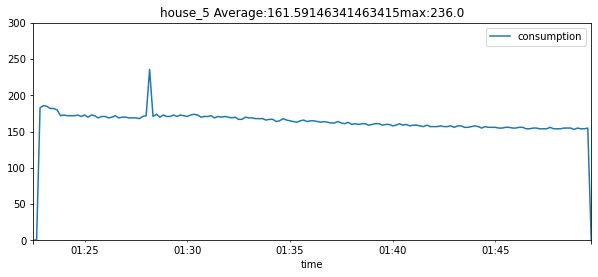

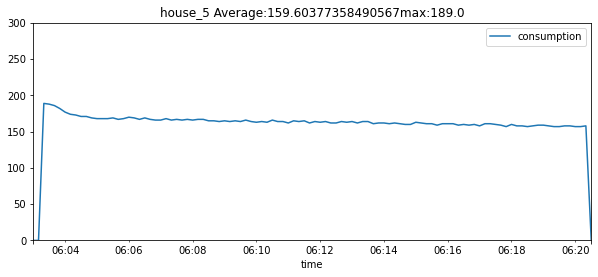

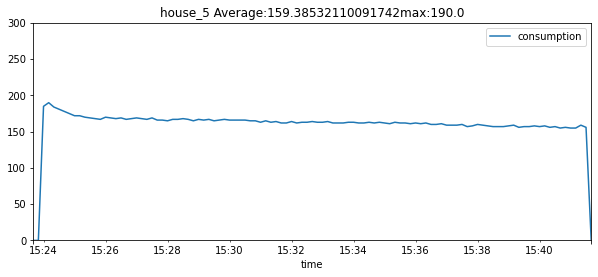

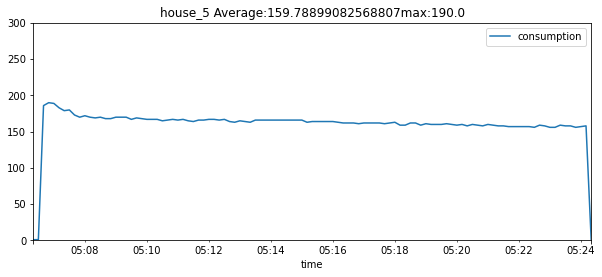

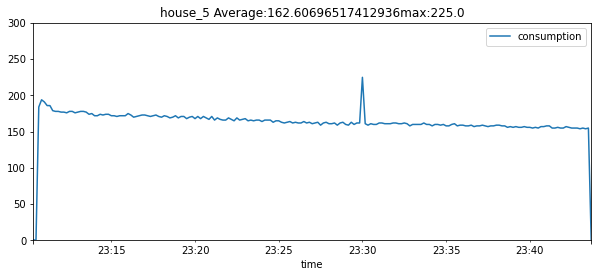

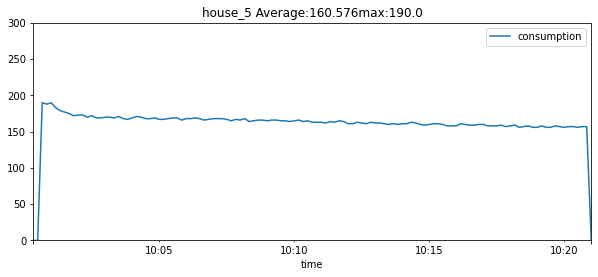

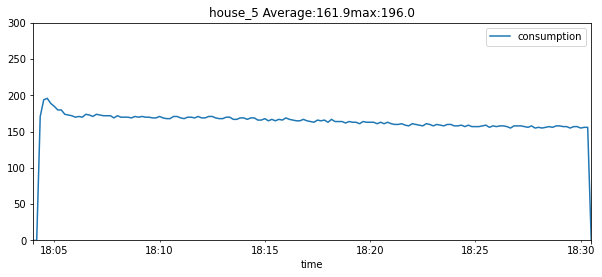

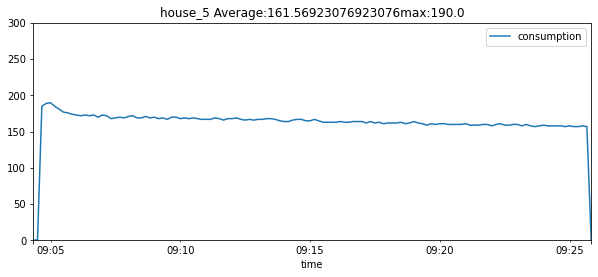

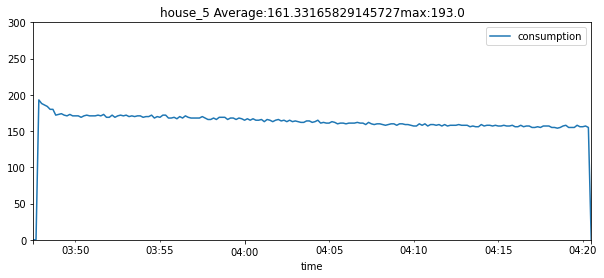

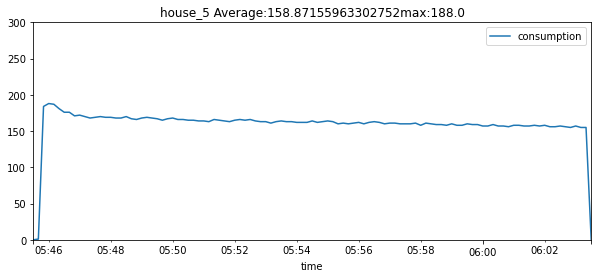

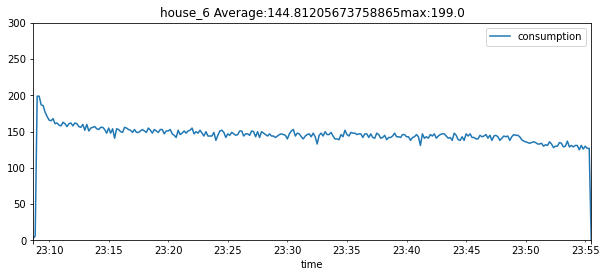

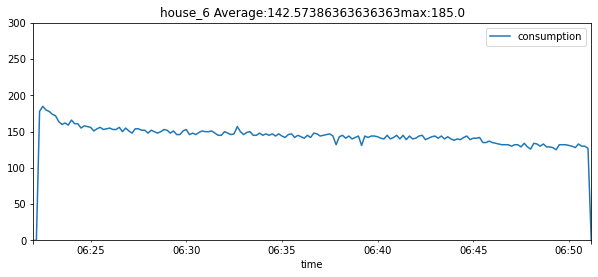

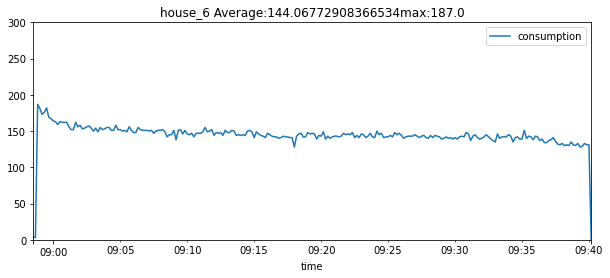

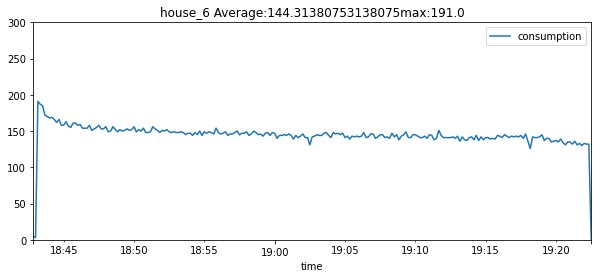

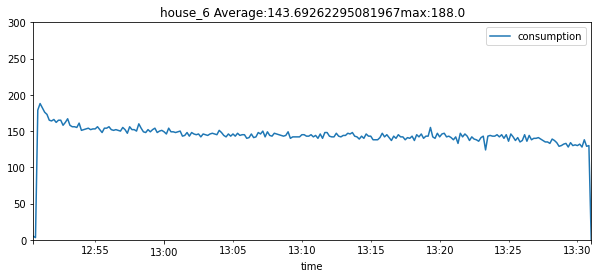

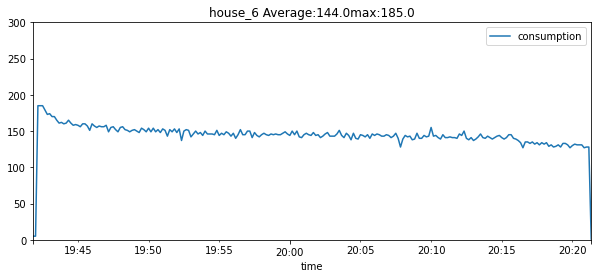

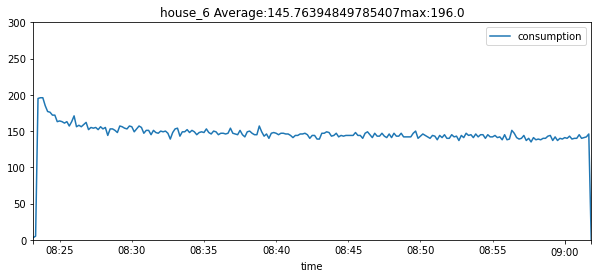

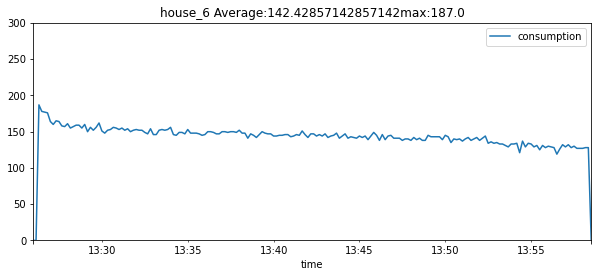

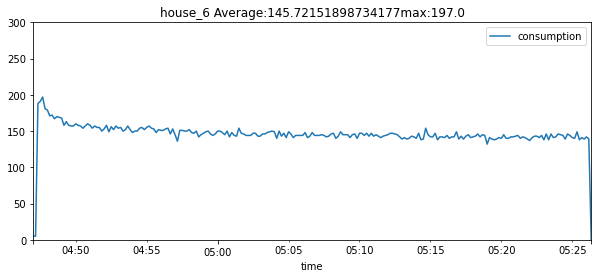

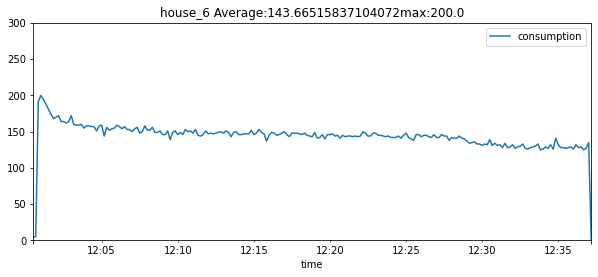

In [ ]:
for house in [1,2,3,5,6]:
    activations=random.sample(range(0, len(redd_activations_normal_consumption[house])),10)
    df=redd_dfs[house]
    for activation in activations:
        beginning=redd_activations_normal_consumption[house][activation][0]
        end=redd_activations_normal_consumption[house][activation][1]
        average_max=find_max_average (df, beginning, end)
        ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house)+" Average:"+str(average_max[0])+"max:"+str((average_max[1])))
        ax.set_ylim(0,300)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa32db00d40> (for post_execute):


KeyboardInterrupt: ignored

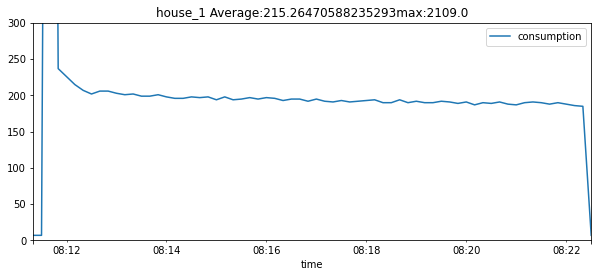

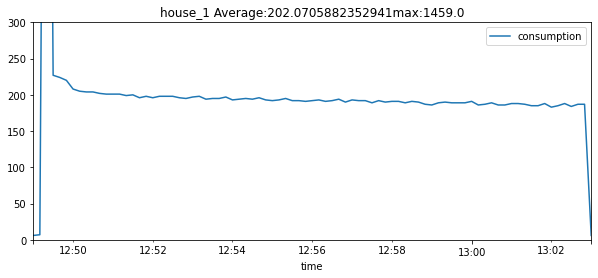

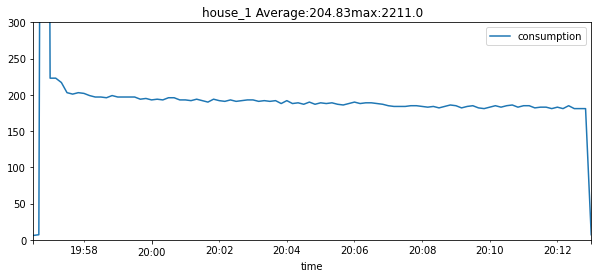

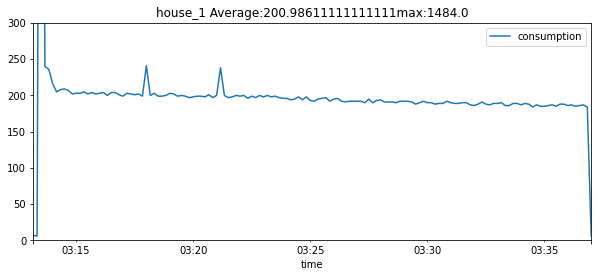

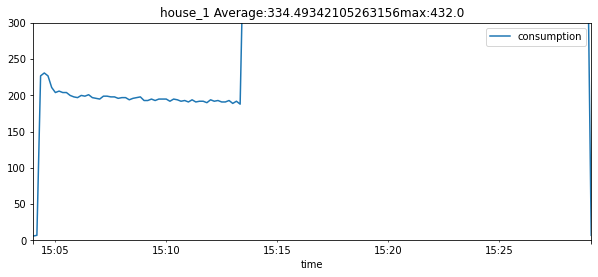

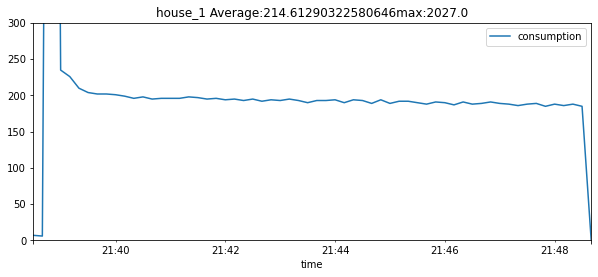

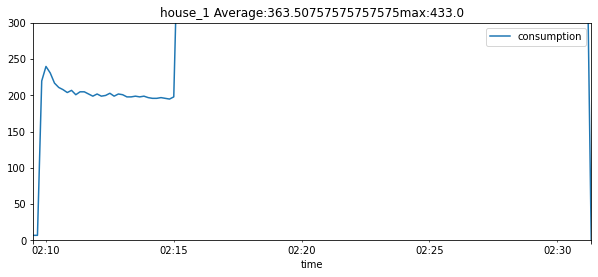

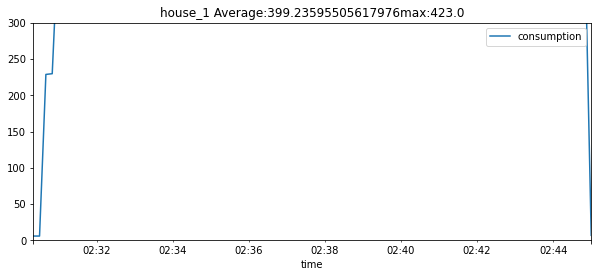

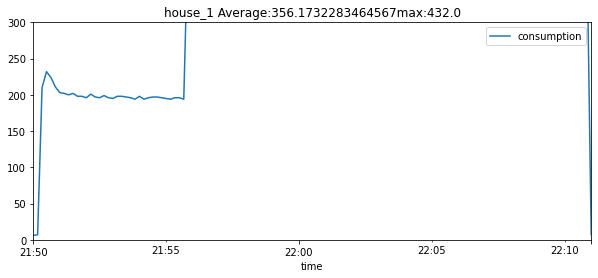

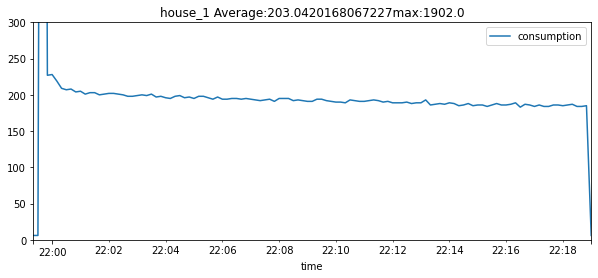

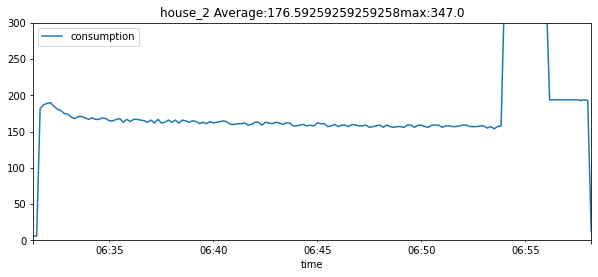

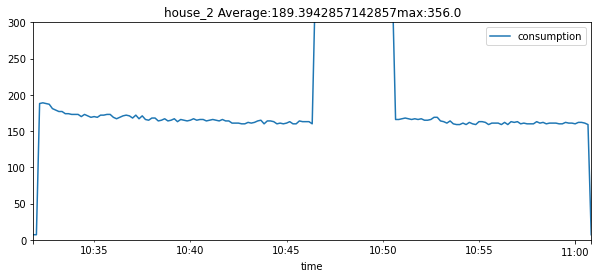

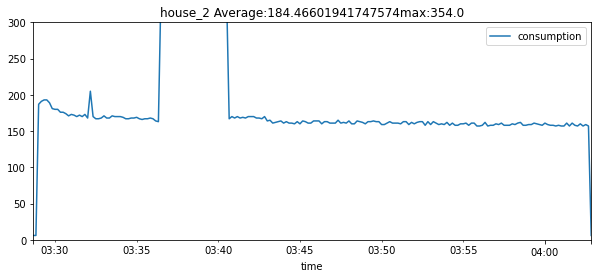

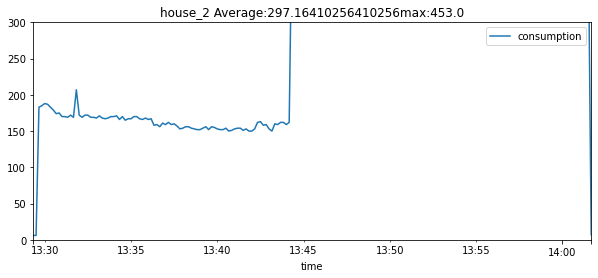

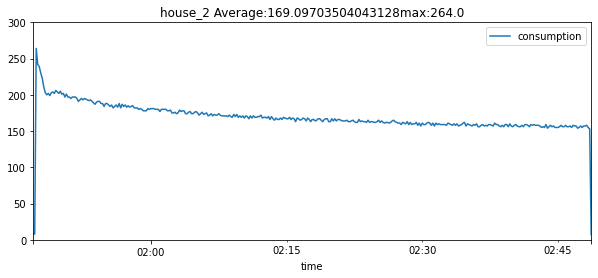

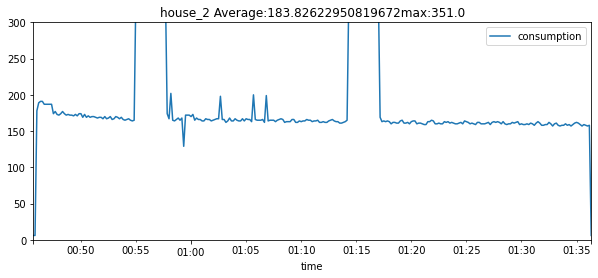

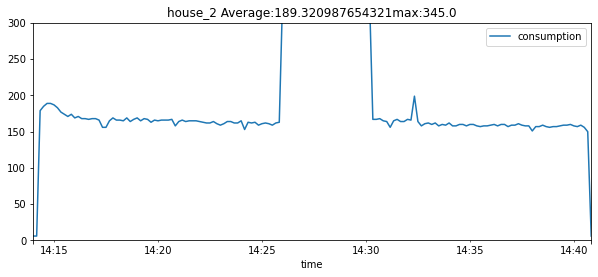

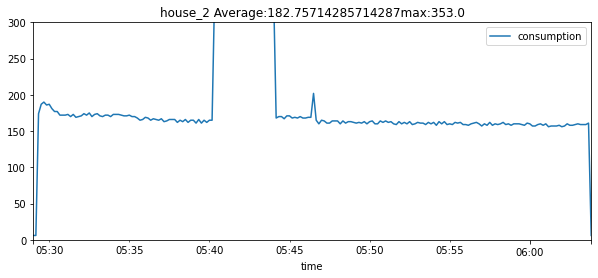

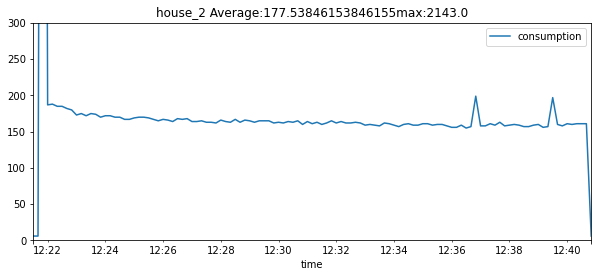

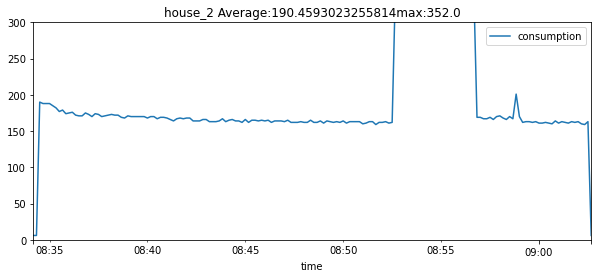

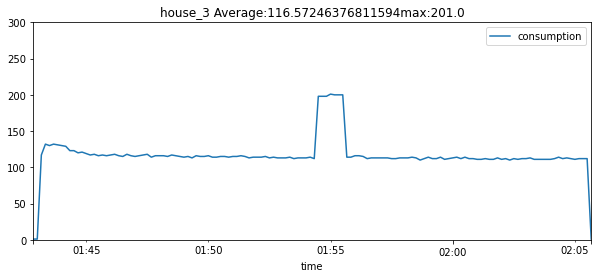

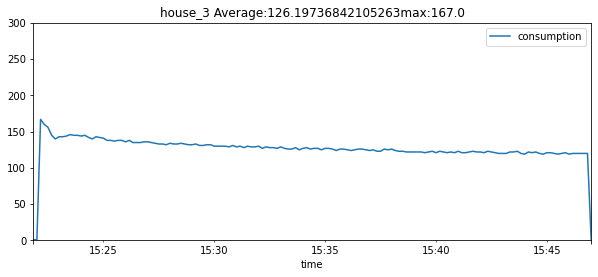

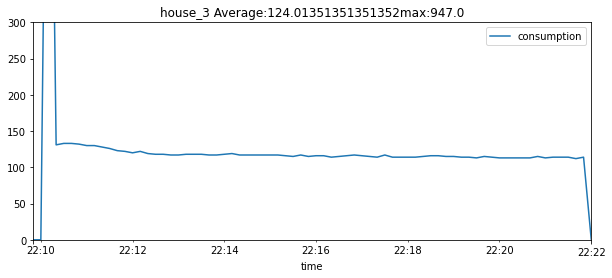

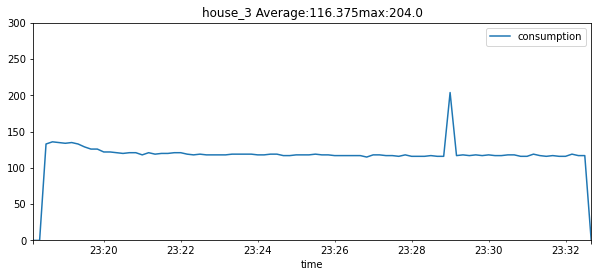

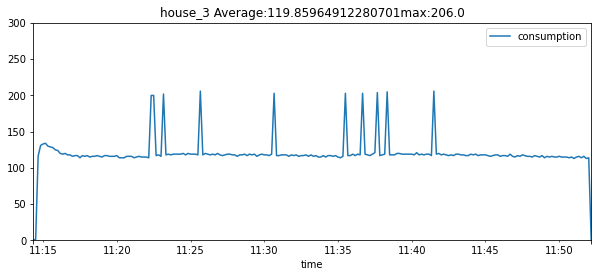

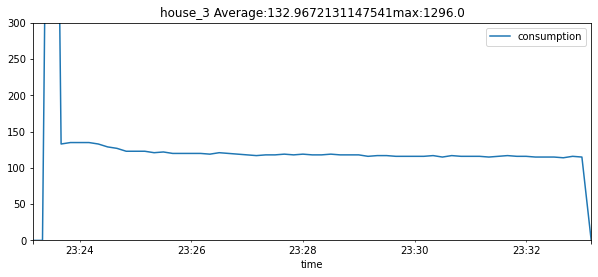

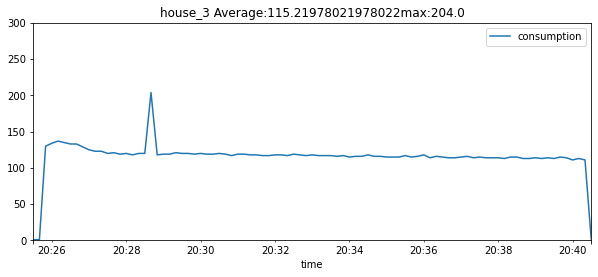

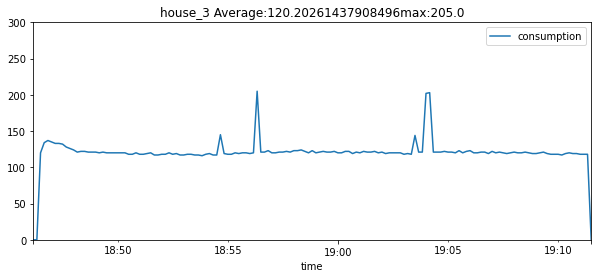

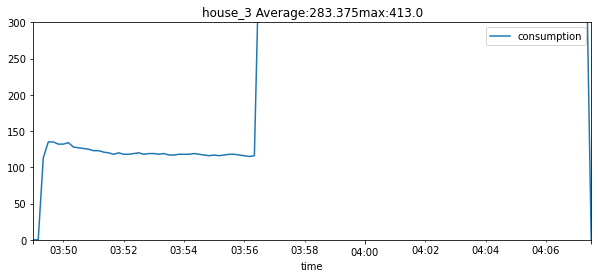

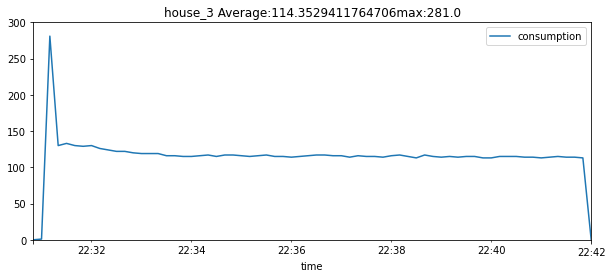

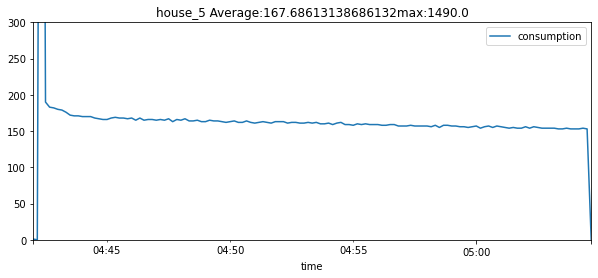

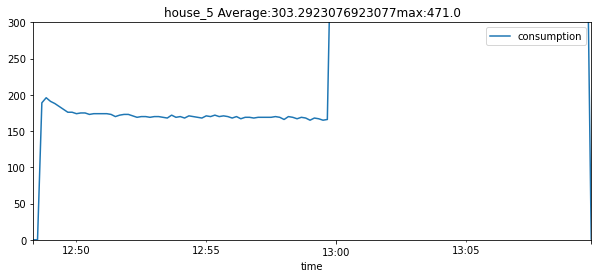

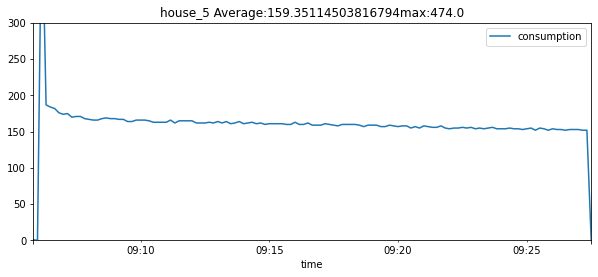

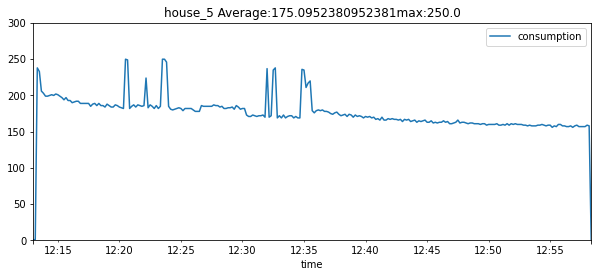

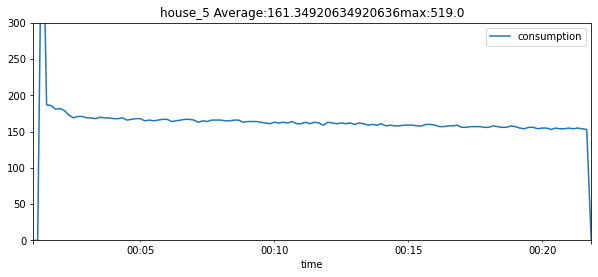

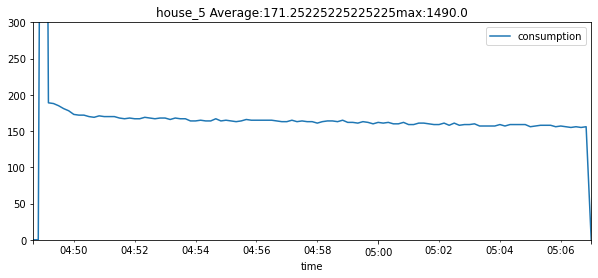

Error in callback <function flush_figures at 0x7fa32da8b3b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for house in [1,2,3,5,6]:
    activations=random.sample(range(0, len(redd_activations_abnormal_consumption[house])),10)
    df=redd_dfs[house]
    for activation in activations:
        beginning=redd_activations_abnormal_consumption[house][activation][0]
        end=redd_activations_abnormal_consumption[house][activation][1]
        average_max=find_max_average (df, beginning, end)
        ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house)+" Average:"+str(average_max[0])+"max:"+str((average_max[1])))
        ax.set_ylim(0,300)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

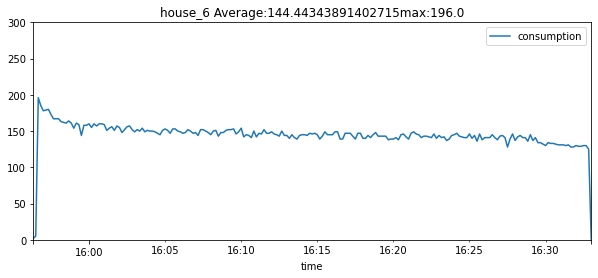

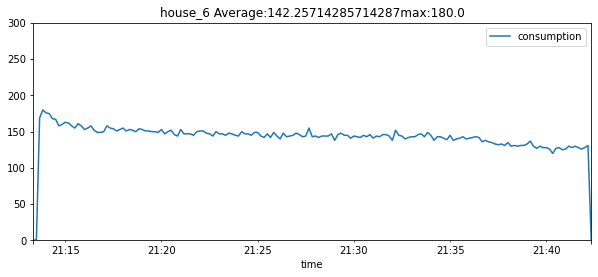

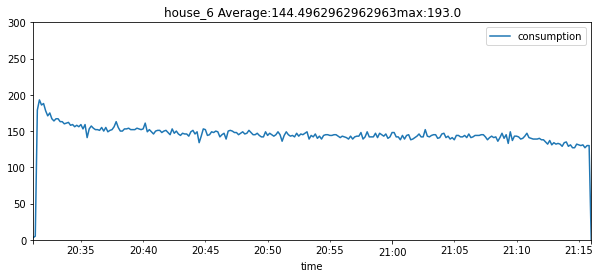

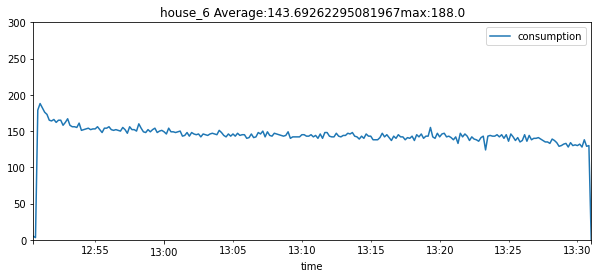

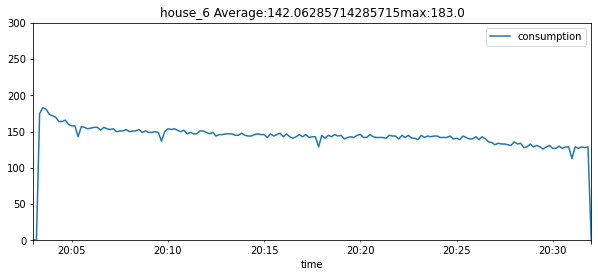

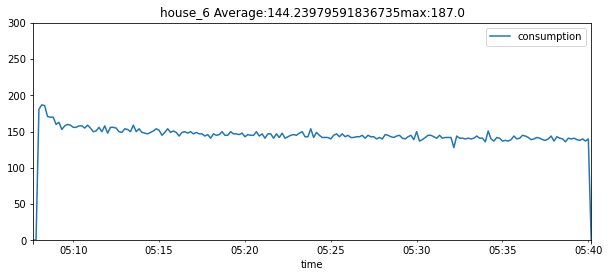

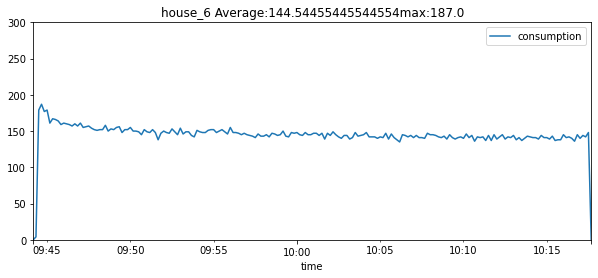

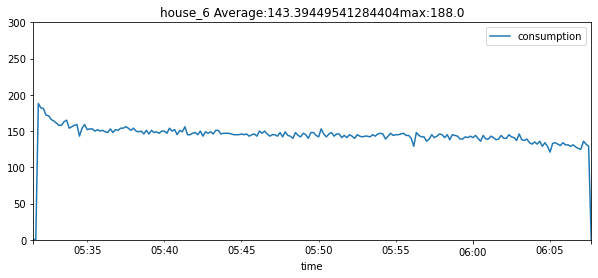

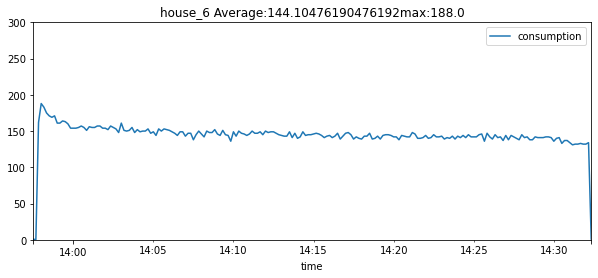

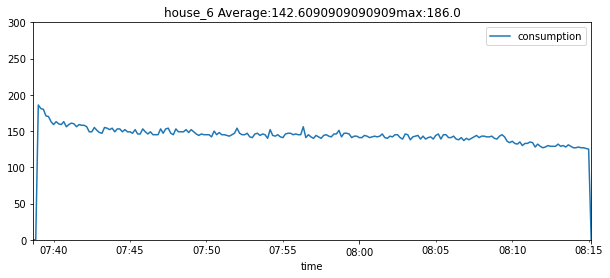

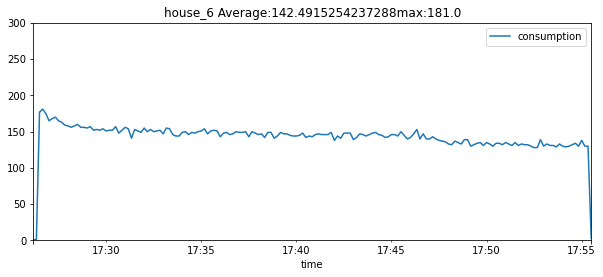

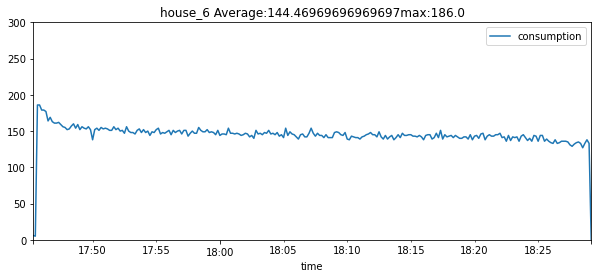

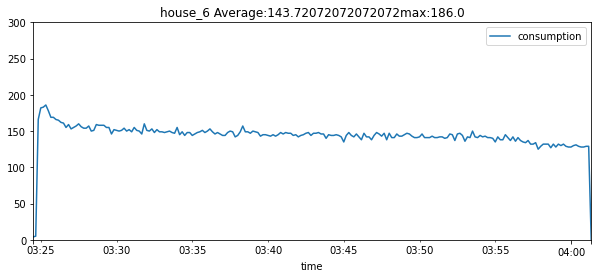

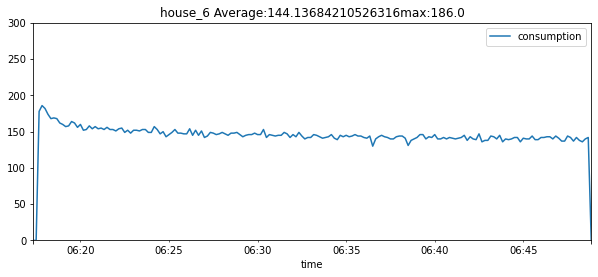

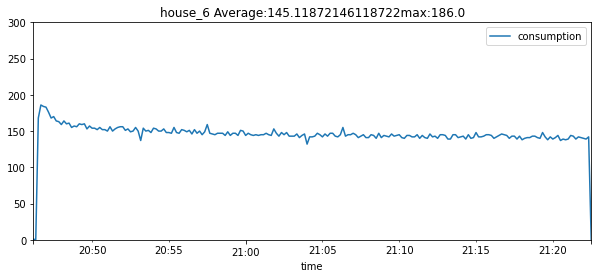

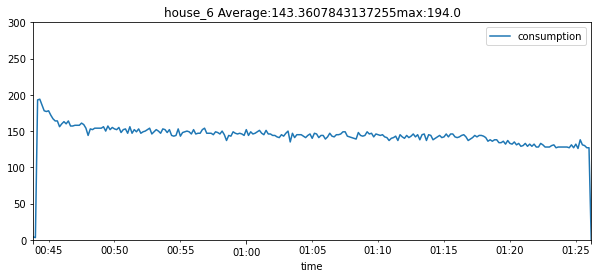

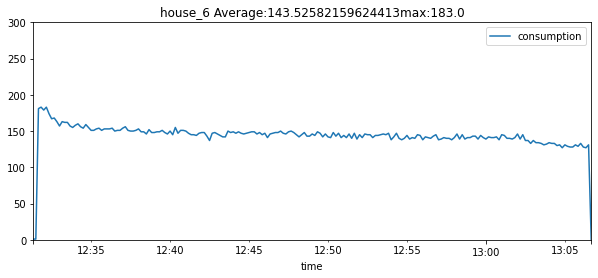

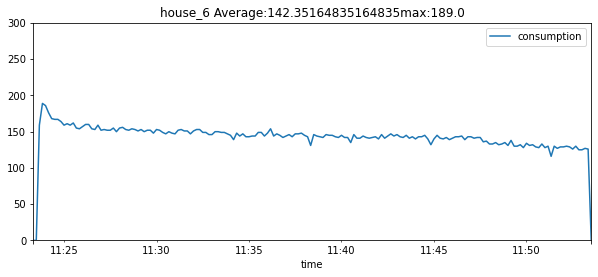

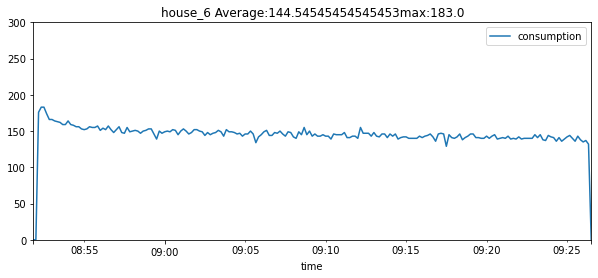

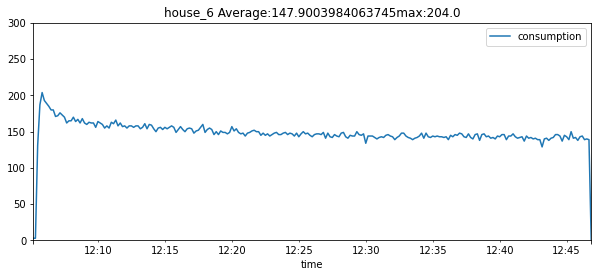

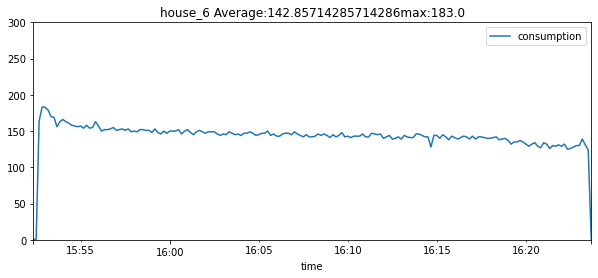

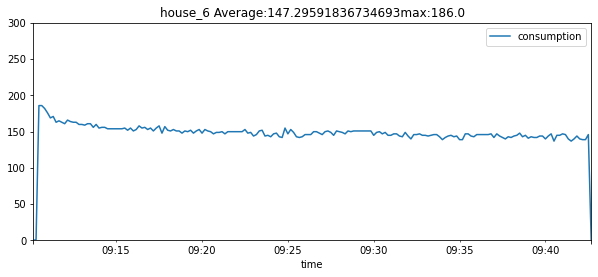

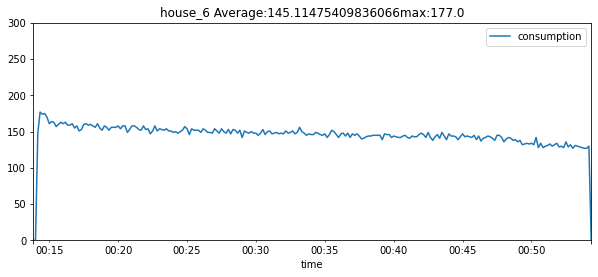

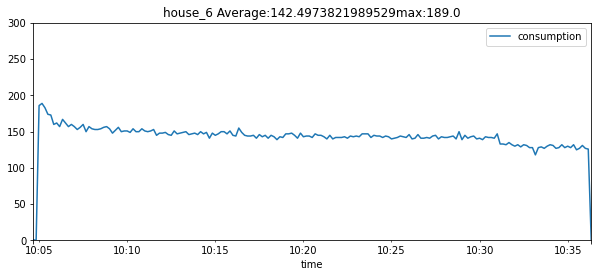

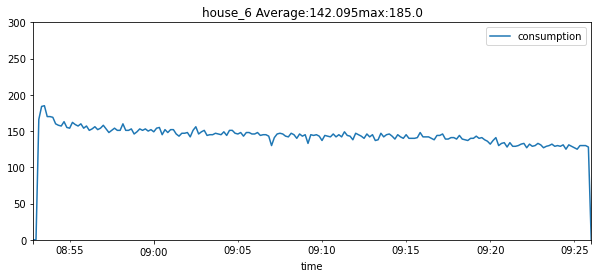

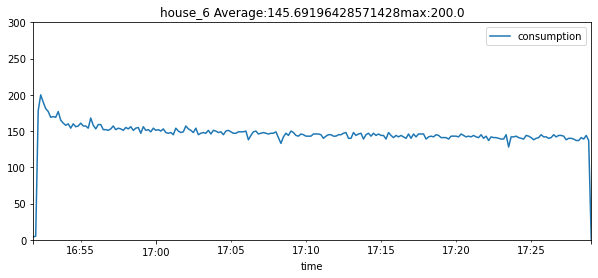

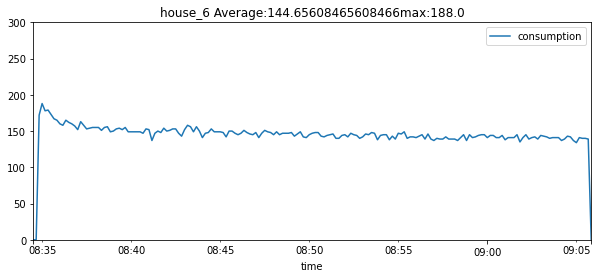

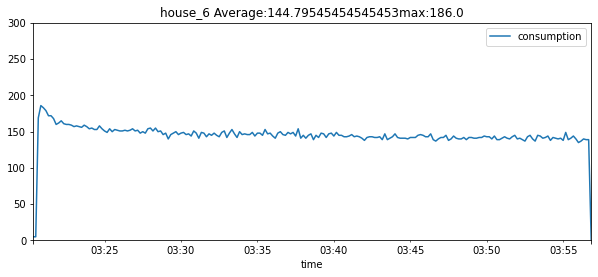

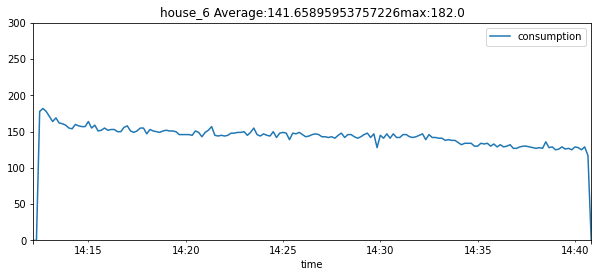

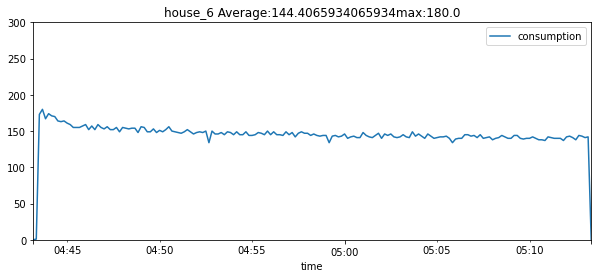

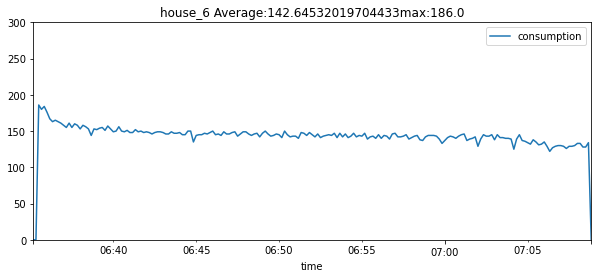

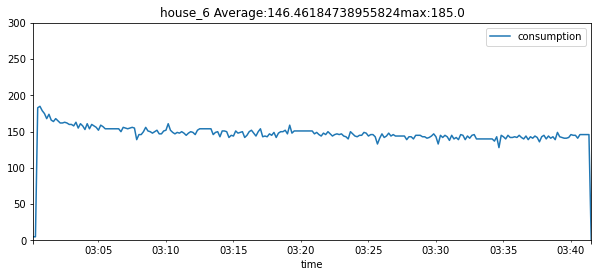

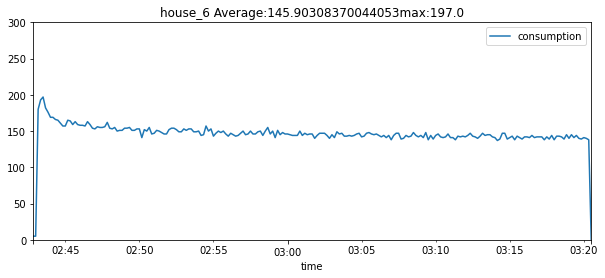

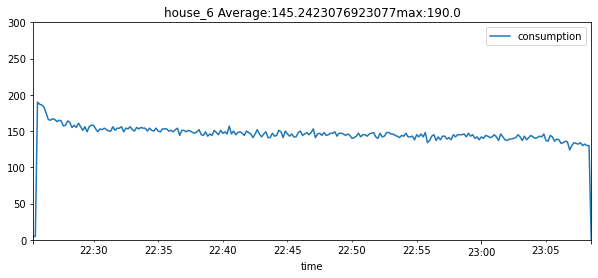

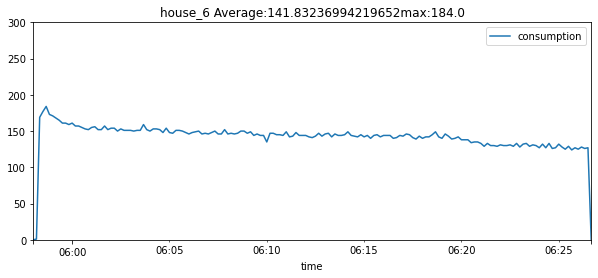

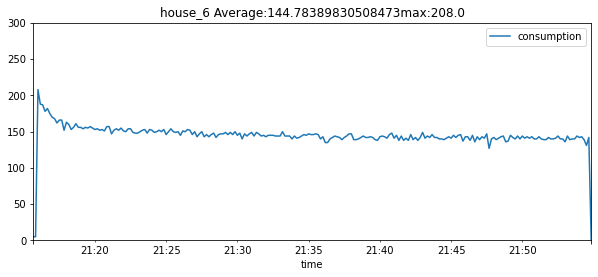

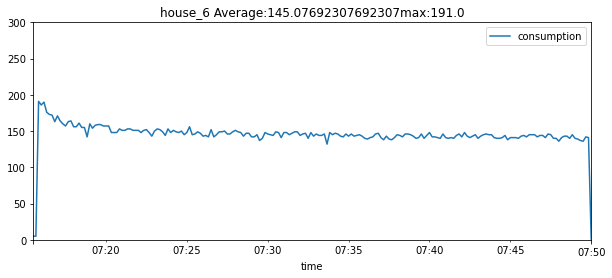

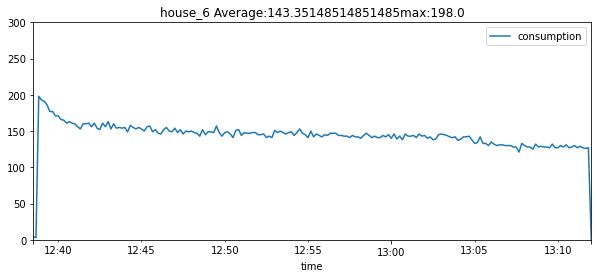

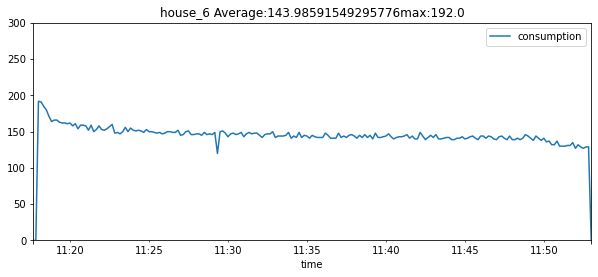

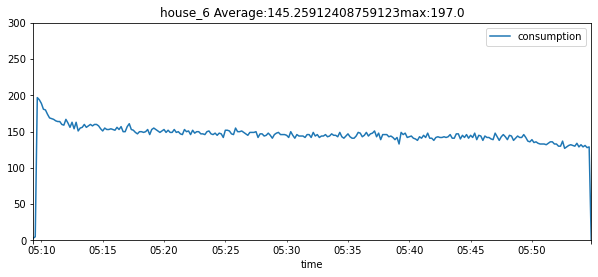

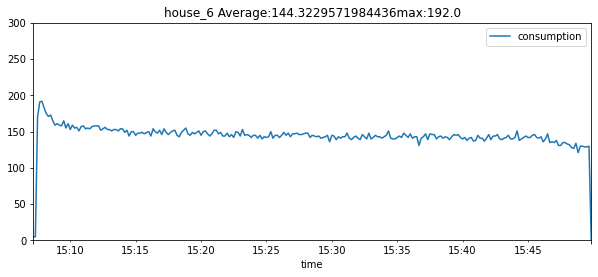

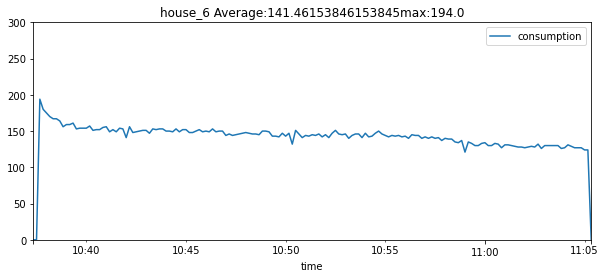

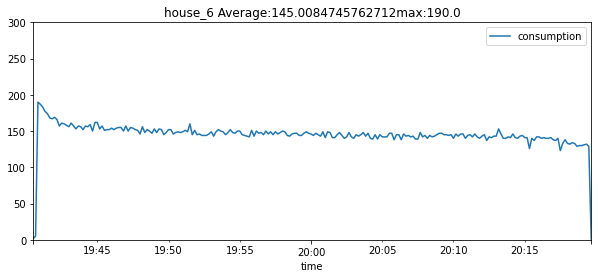

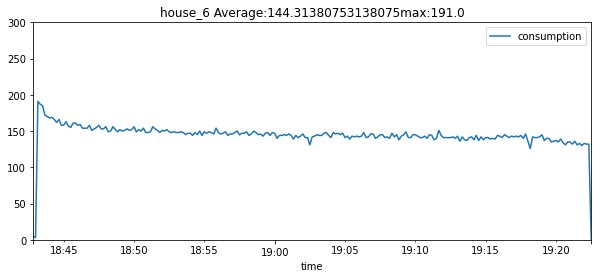

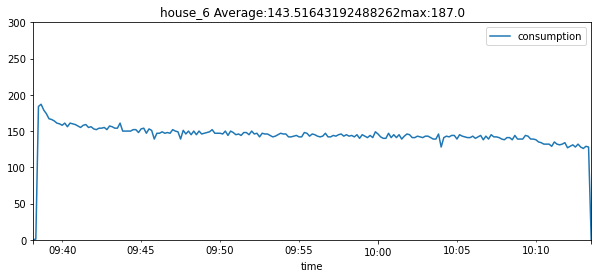

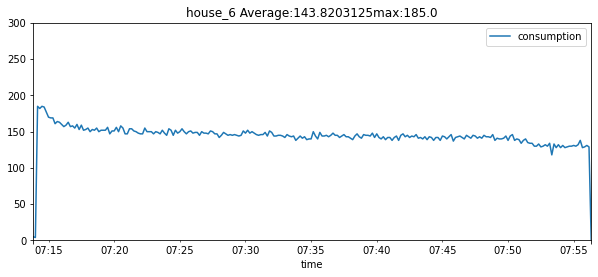

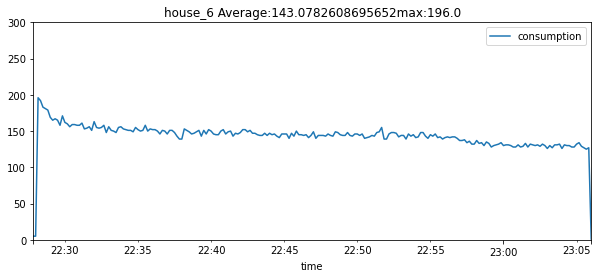

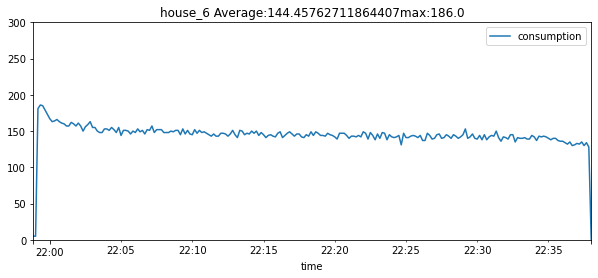

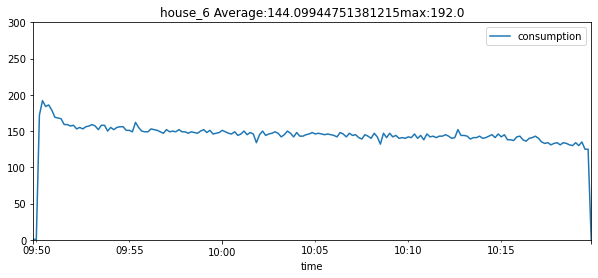

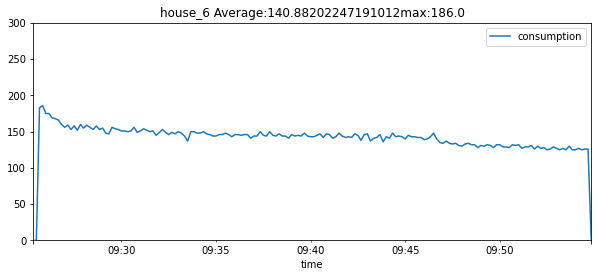

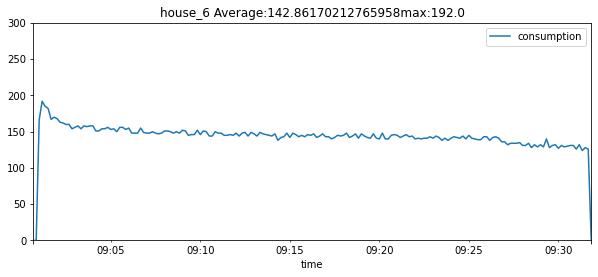

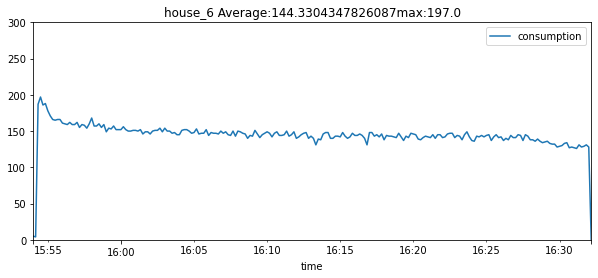

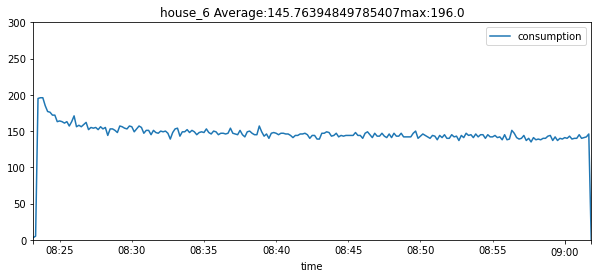

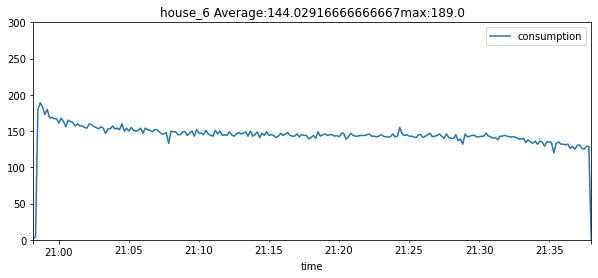

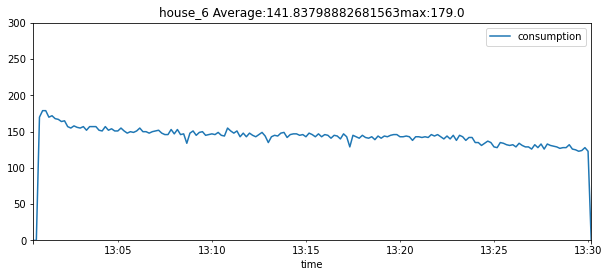

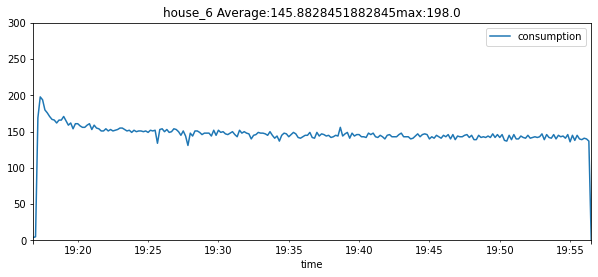

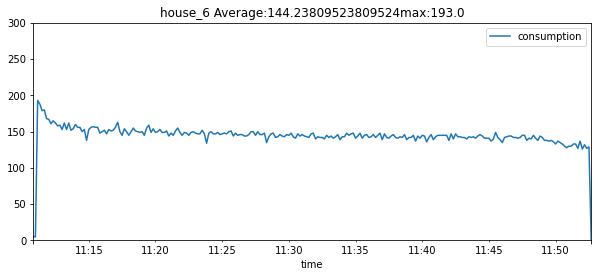

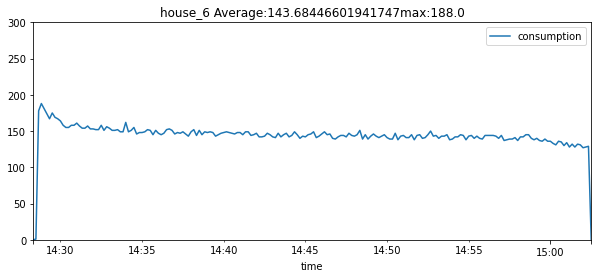

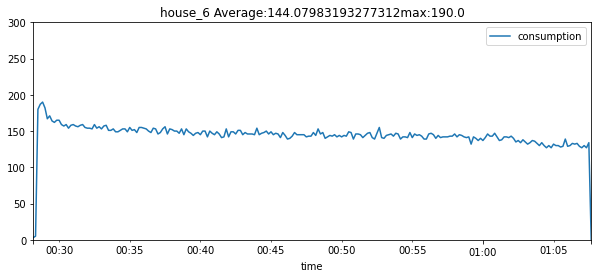

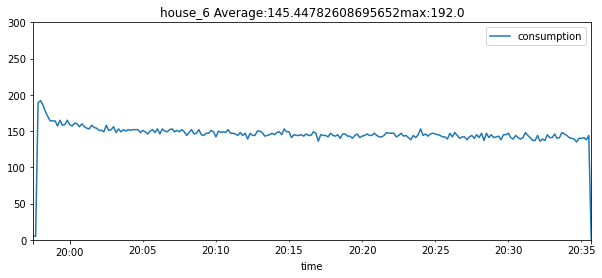

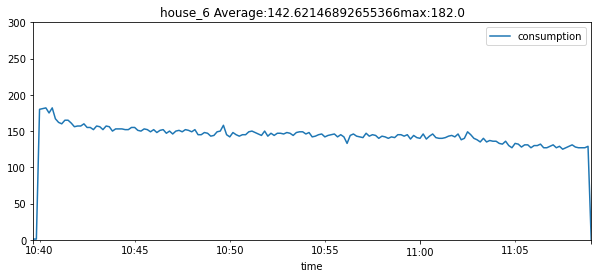

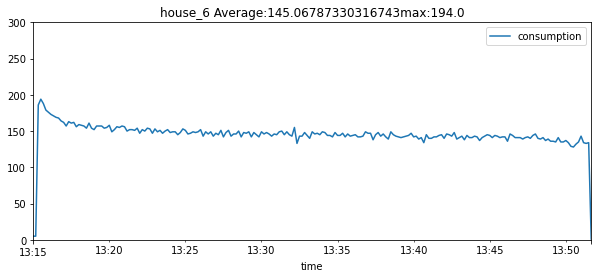

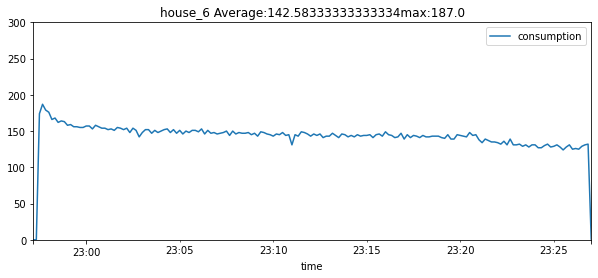

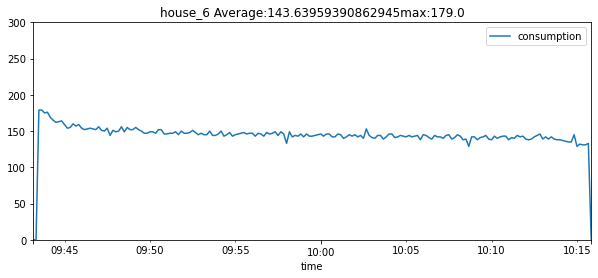

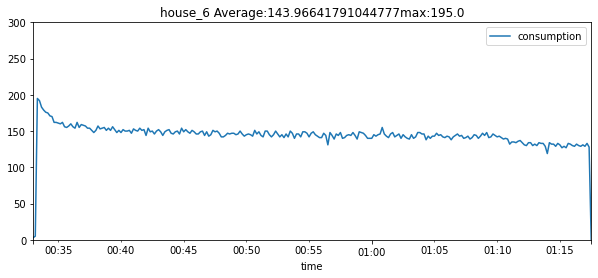

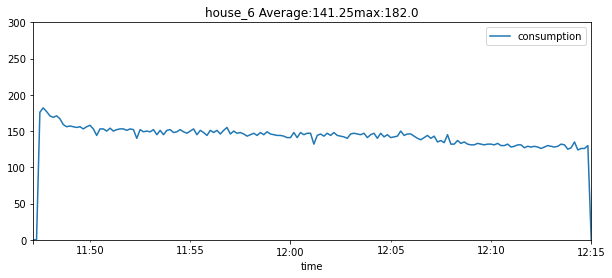

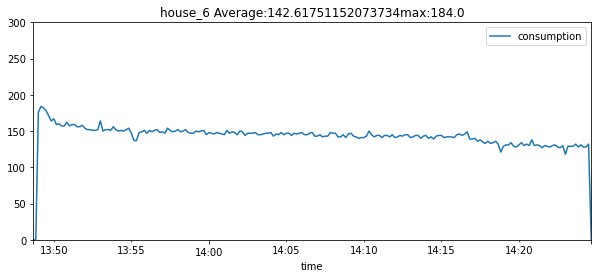

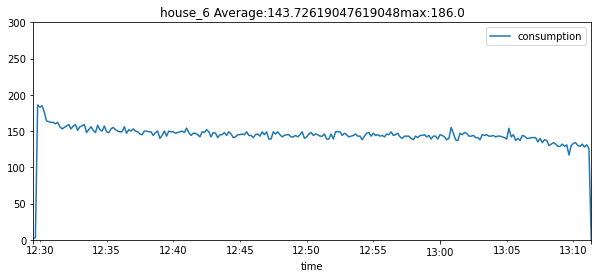

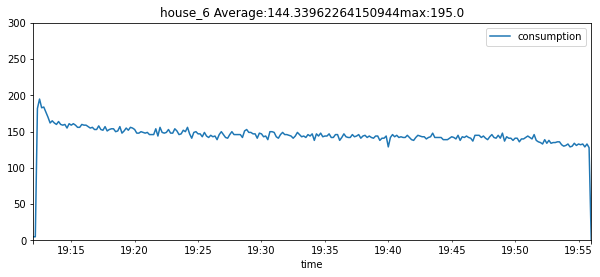

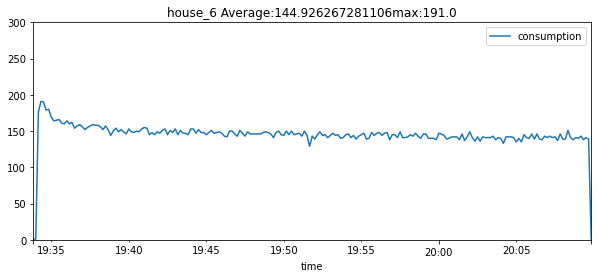

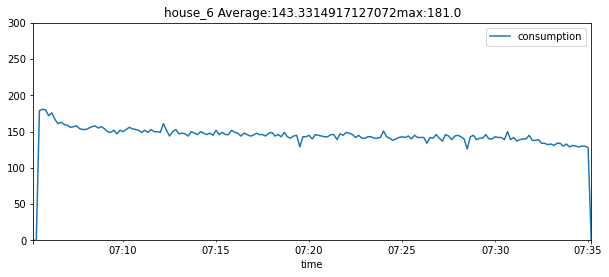

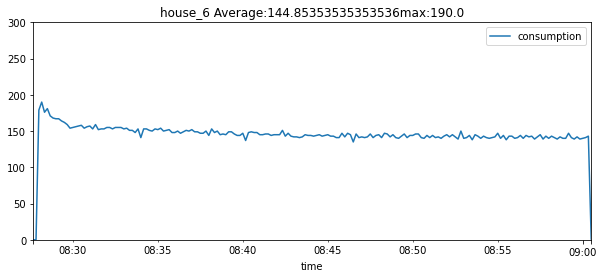

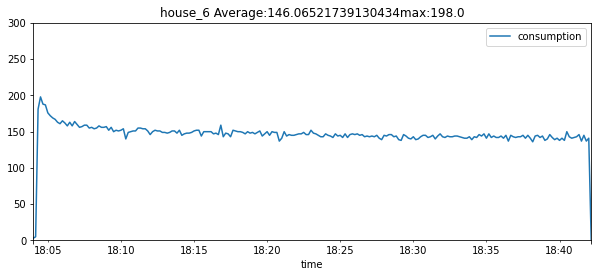

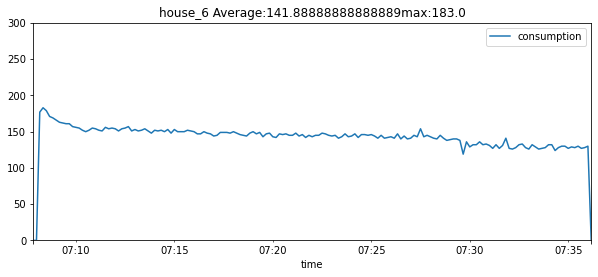

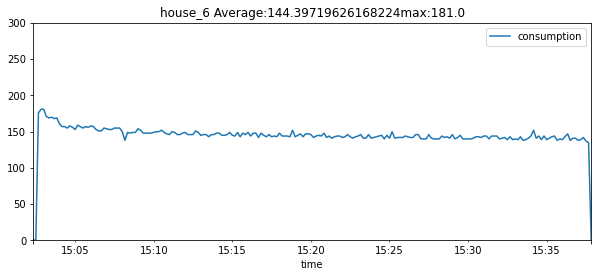

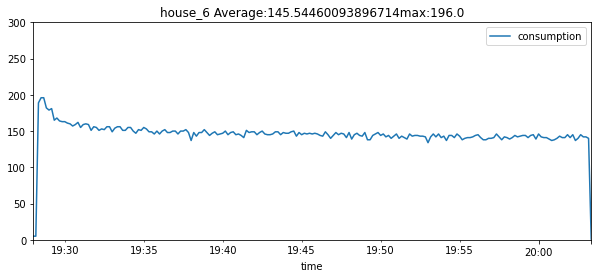

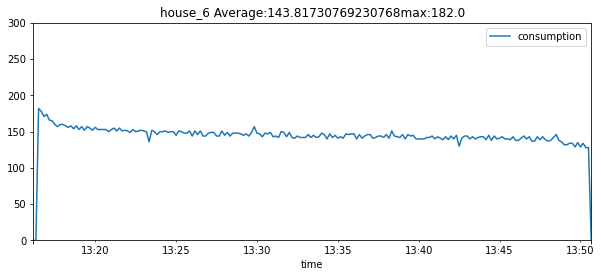

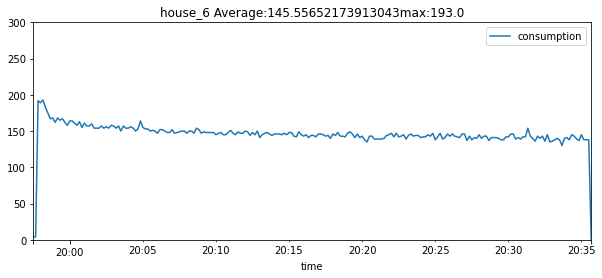

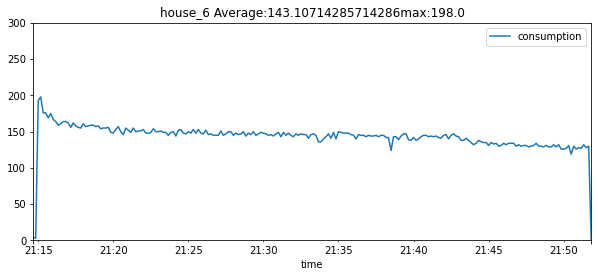

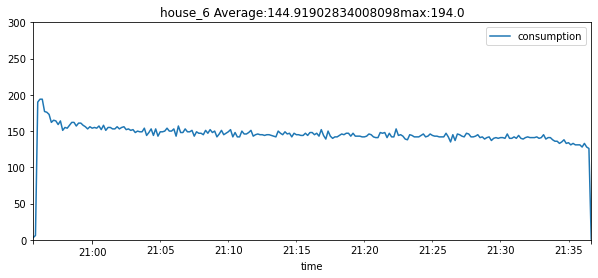

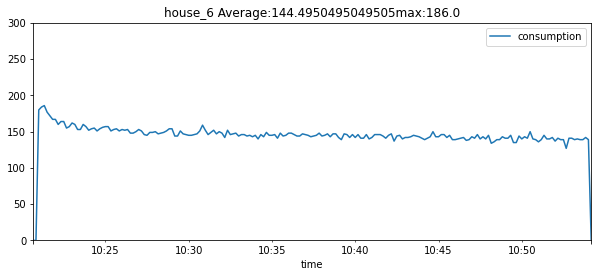

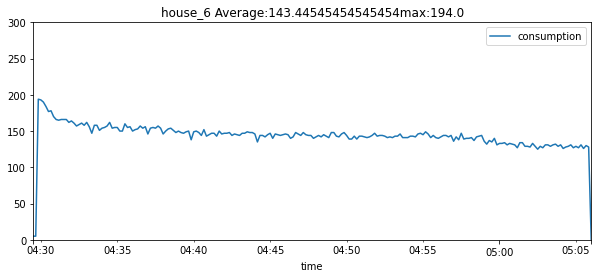

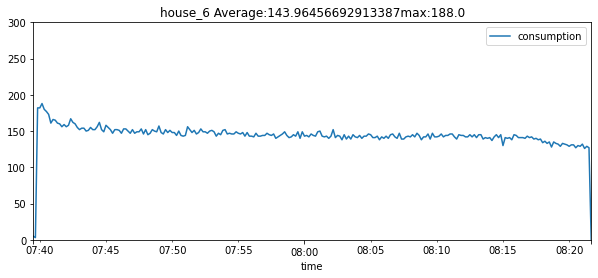

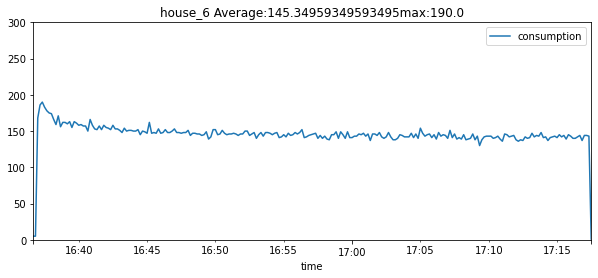

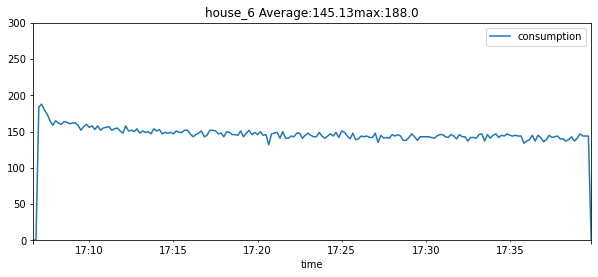

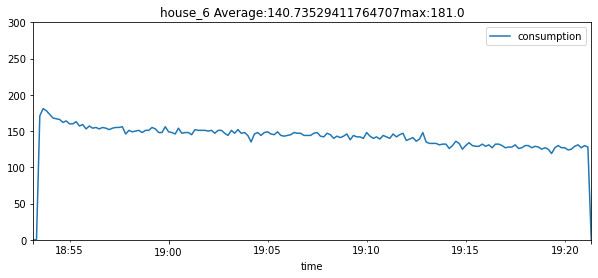

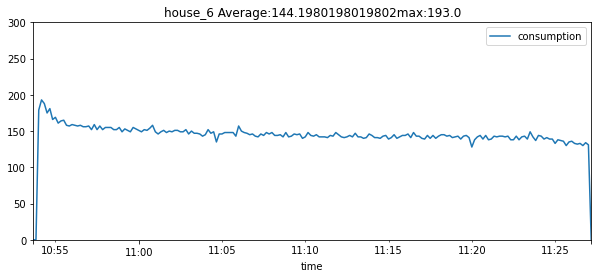

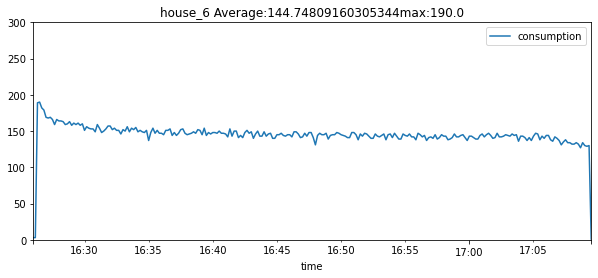

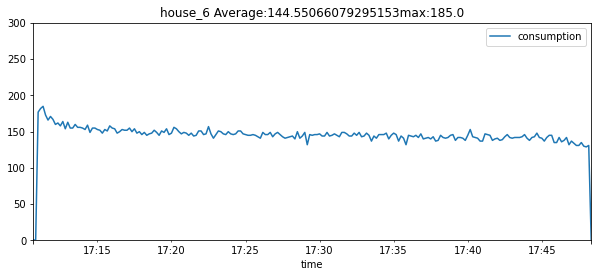

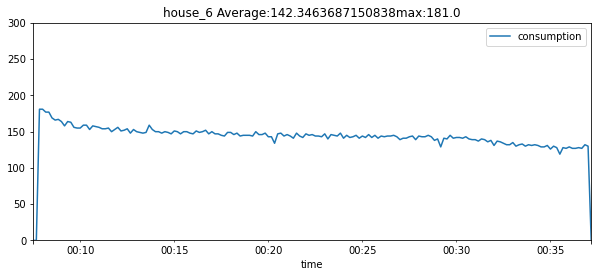

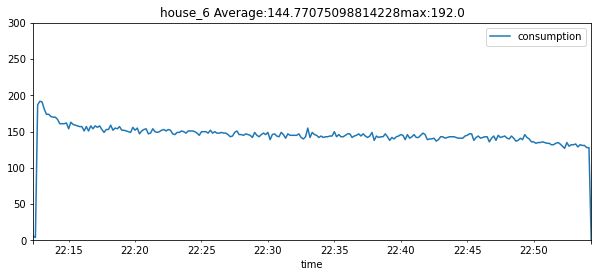

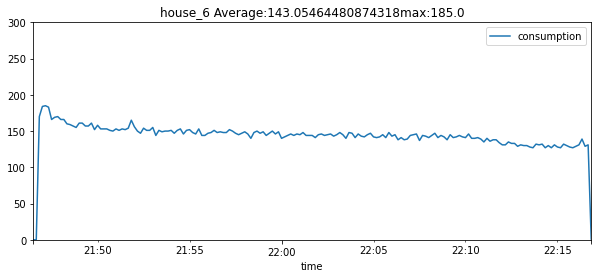

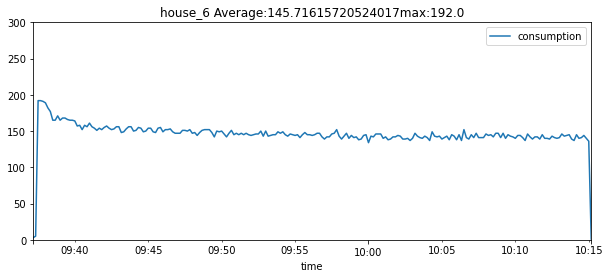

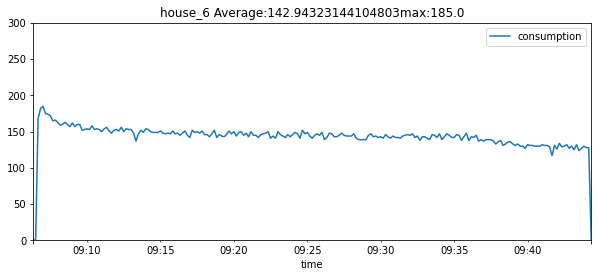

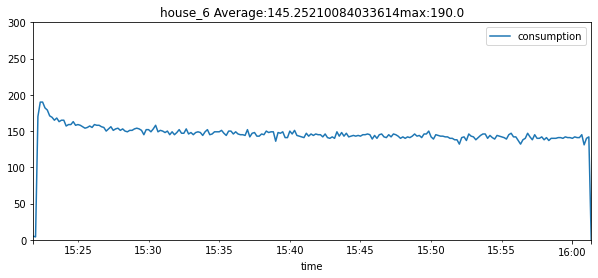

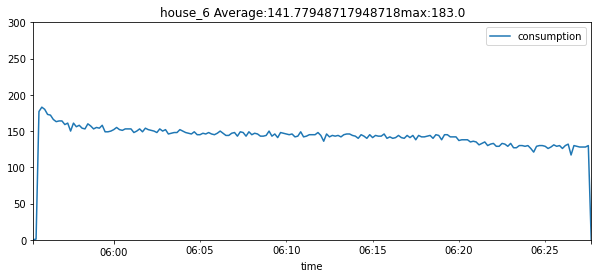

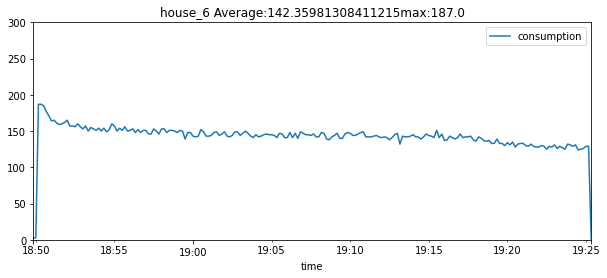

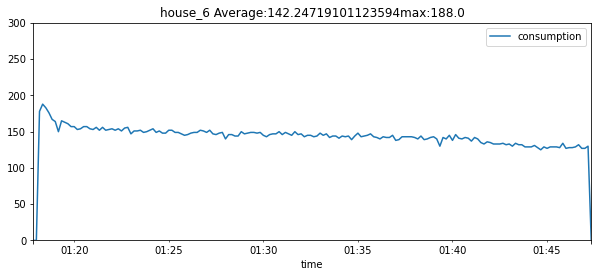

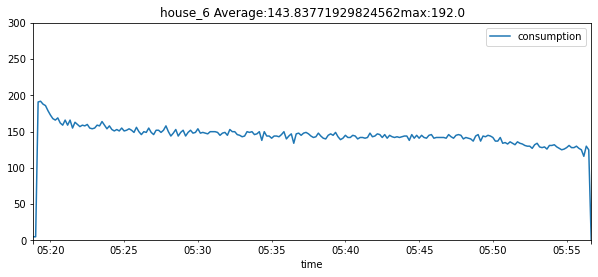

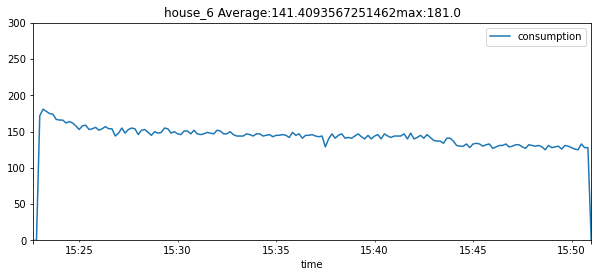

In [ ]:
house=6
activations=random.sample(range(0,len(redd_activations_normal_consumption[house])),100)
df=redd_house(house)
for activation in activations:
    beginning=redd_activations_normal_consumption[house][activation][0]
    end=redd_activations_normal_consumption[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house)+" Average:"+str(sum(df.consumption.iloc[beginning:end])/len(df.consumption.iloc[beginning:end]))+"max:"+str(max(df.consumption.iloc[beginning:end])))
    ax.set_ylim(0,300)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

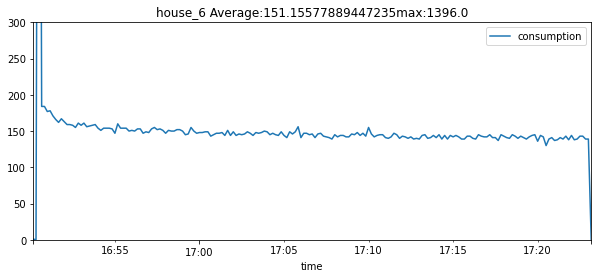

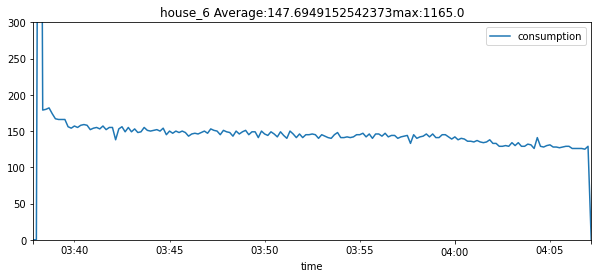

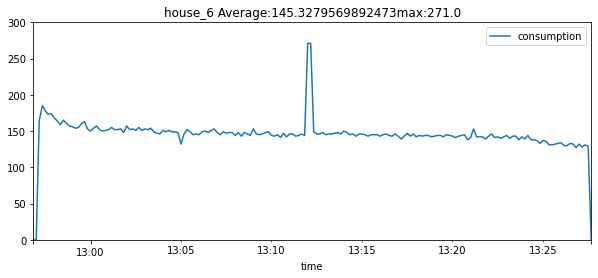

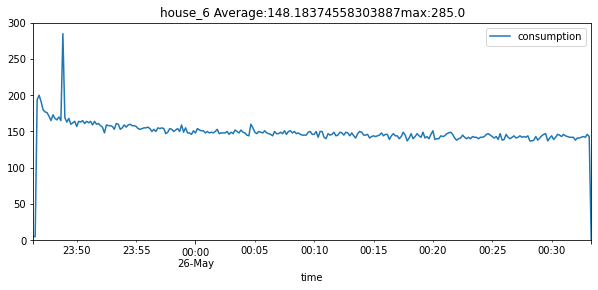

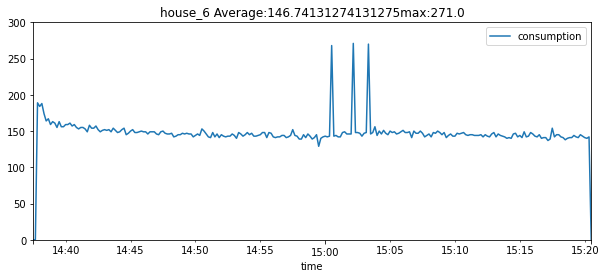

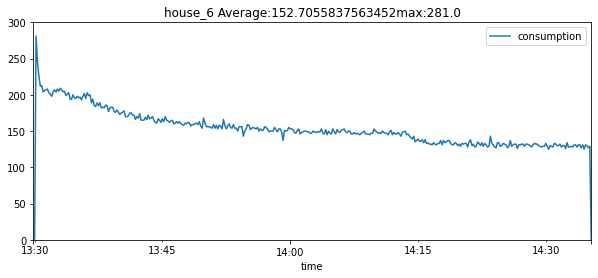

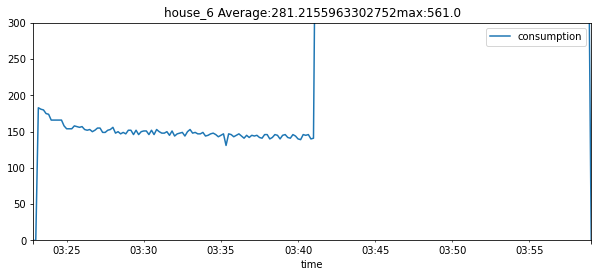

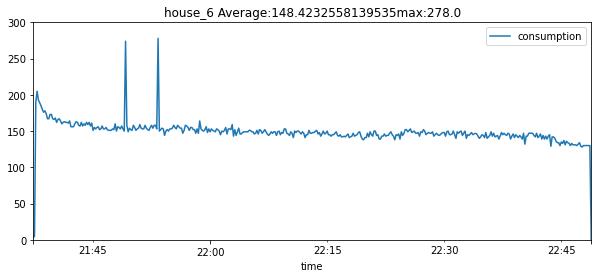

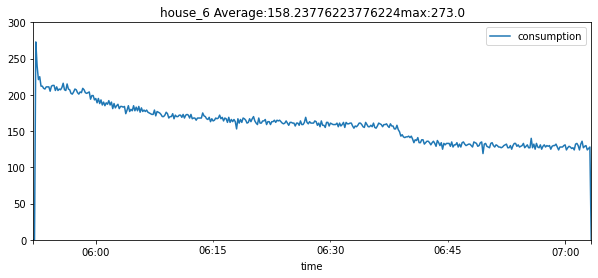

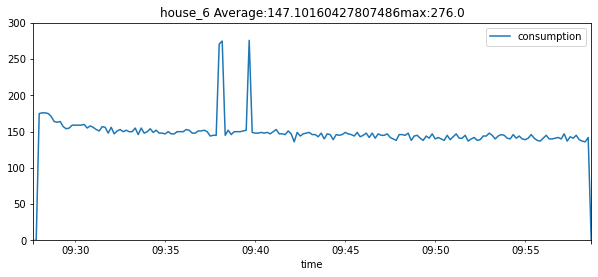

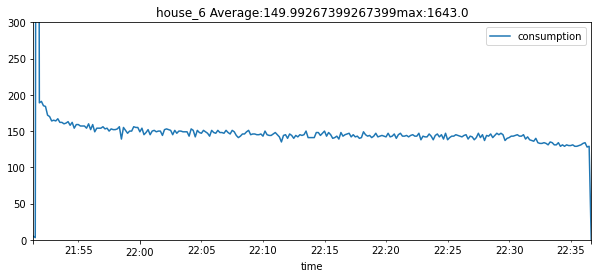

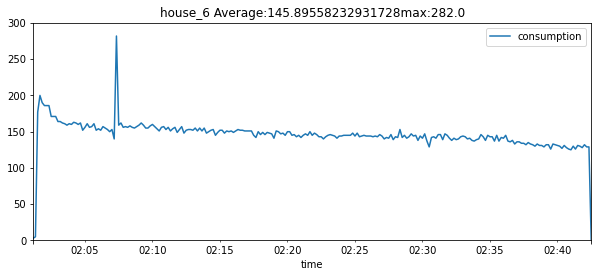

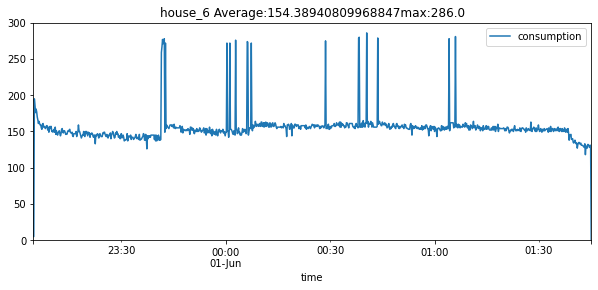

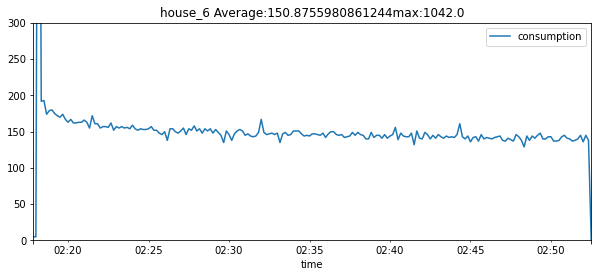

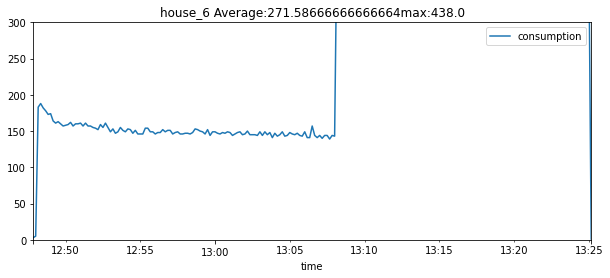

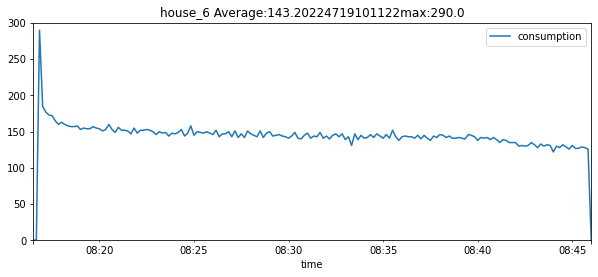

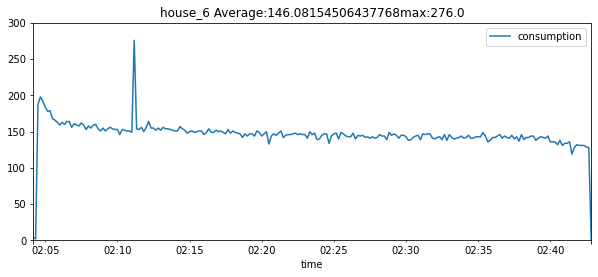

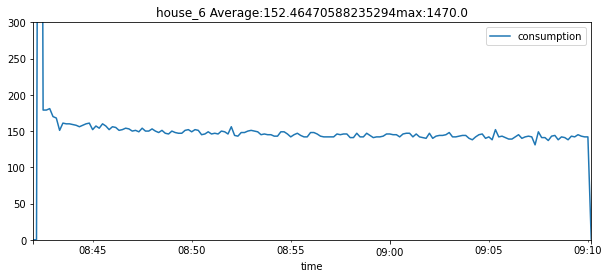

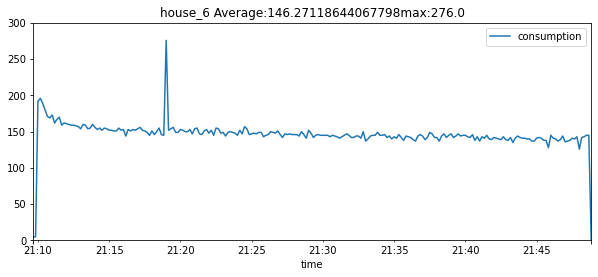

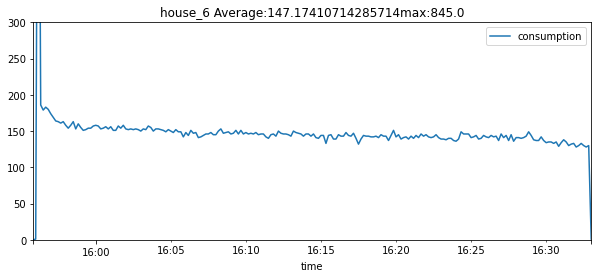

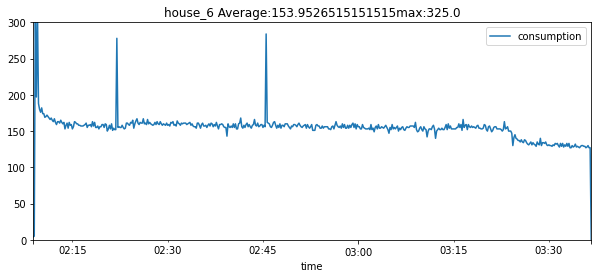

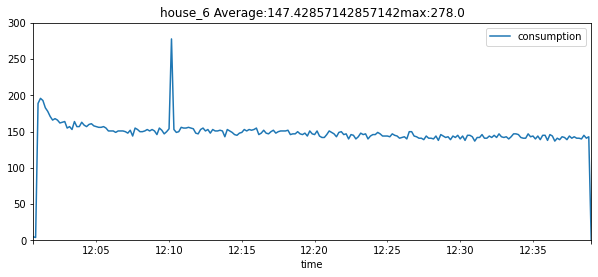

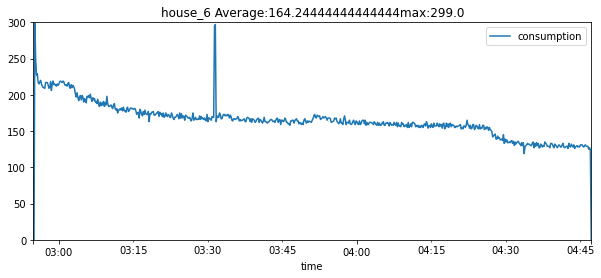

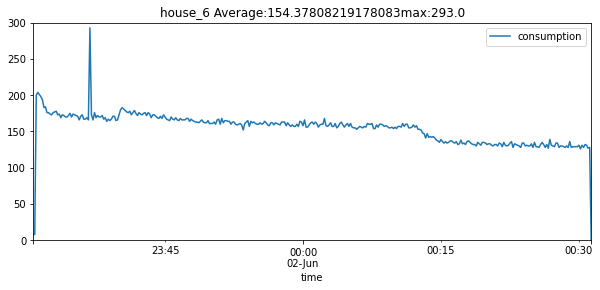

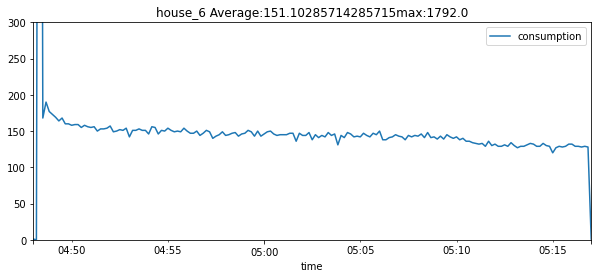

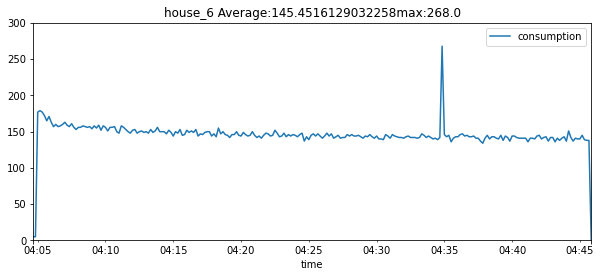

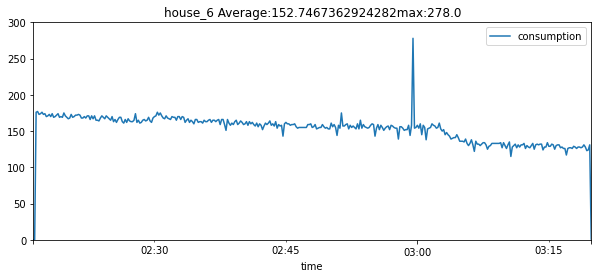

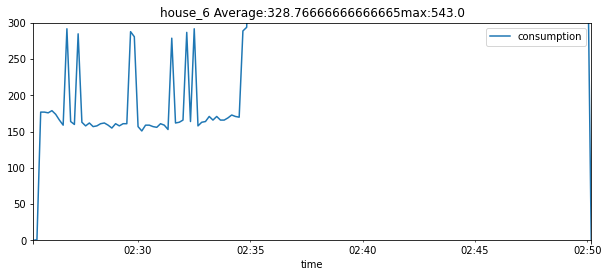

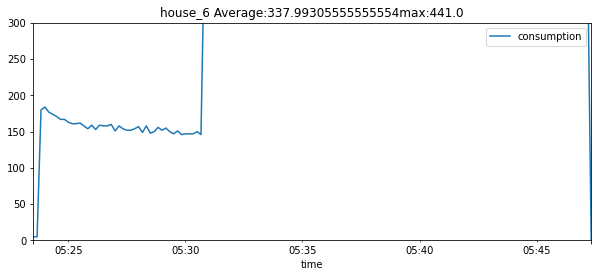

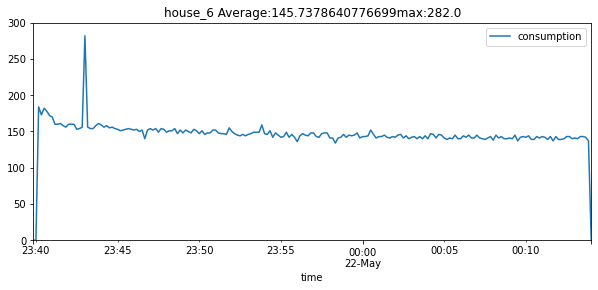

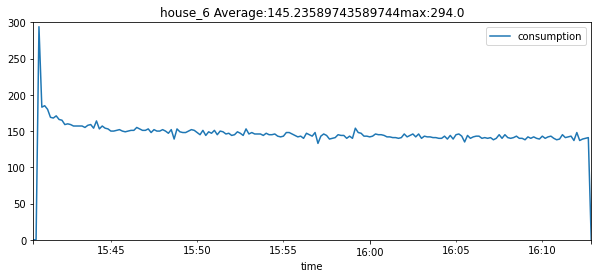

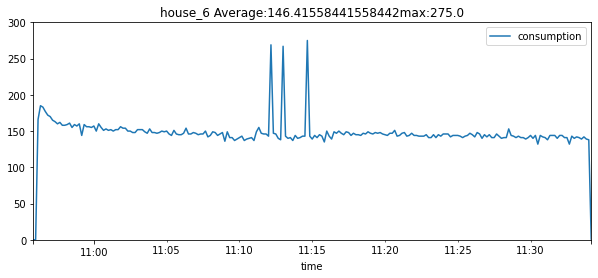

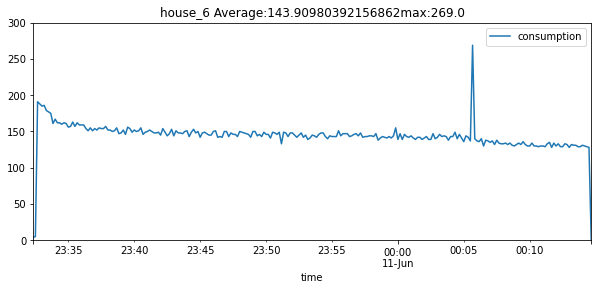

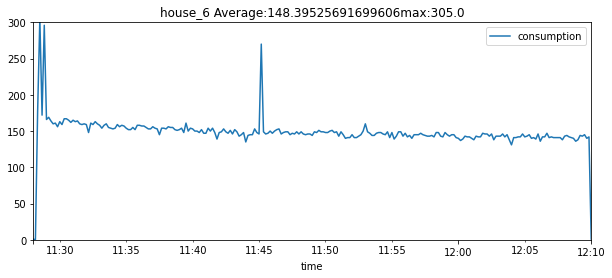

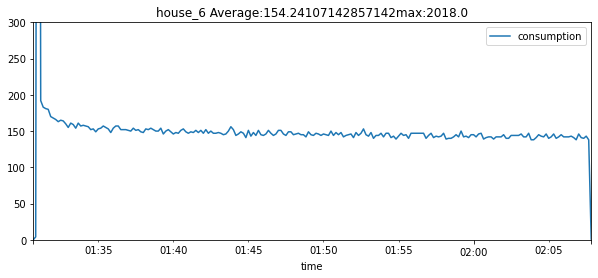

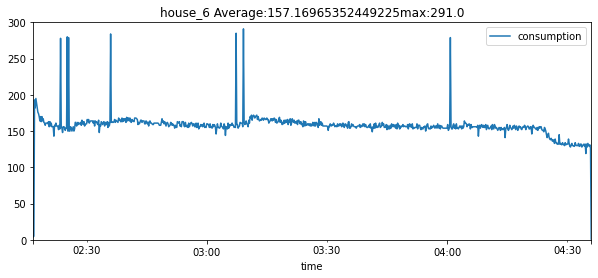

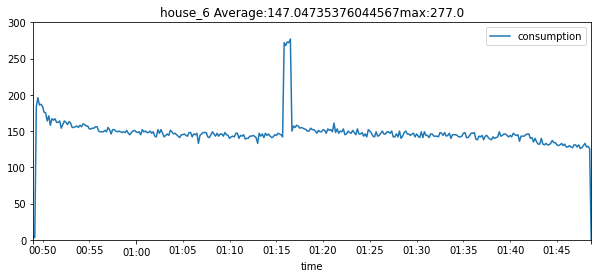

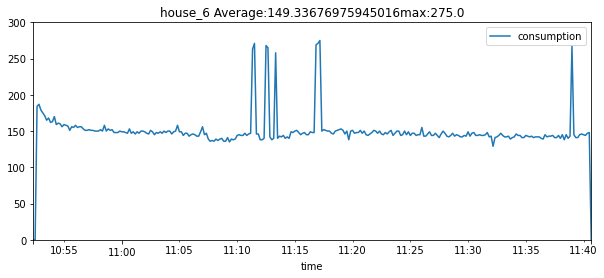

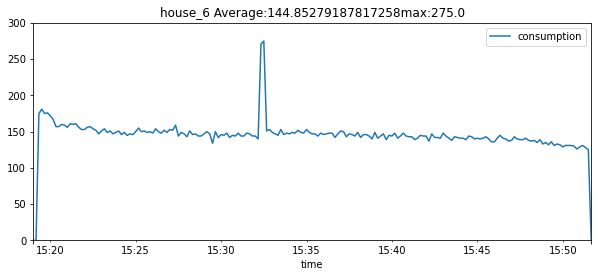

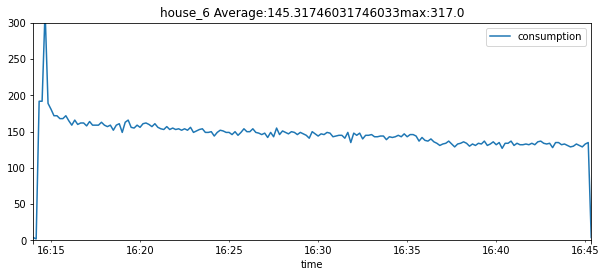

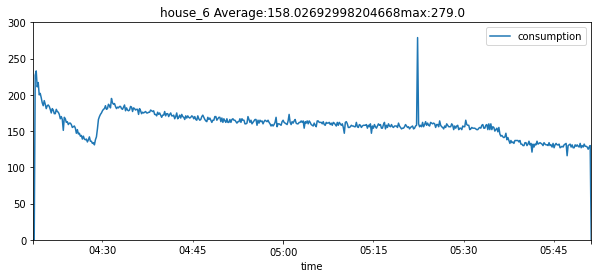

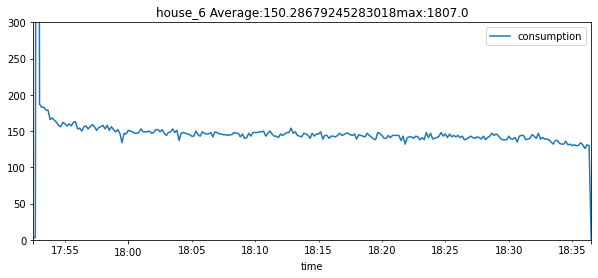

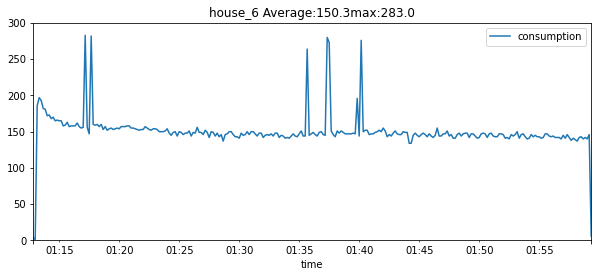

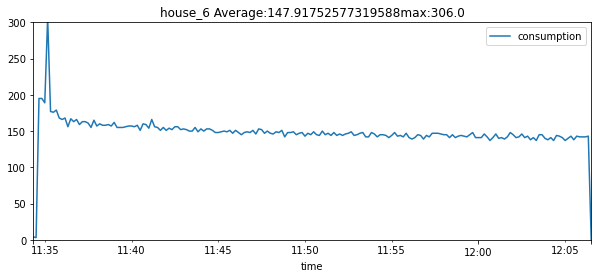

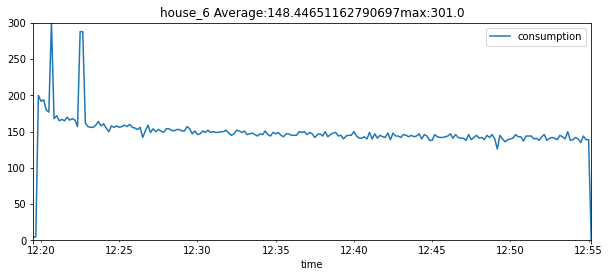

In [ ]:
house=6
activations=random.sample(range(0,len(redd_activations_abnormal_consumption[house])),45)
df=redd_house(house)
for activation in activations:
    beginning=redd_activations_abnormal_consumption[house][activation][0]
    end=redd_activations_abnormal_consumption[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house)+" Average:"+str(sum(df.consumption.iloc[beginning:end])/len(df.consumption.iloc[beginning:end]))+"max:"+str(max(df.consumption.iloc[beginning:end])))
    ax.set_ylim(0,300)

In [ ]:
redd_activations_normal_consumption_durations_list=[]
for house in redd_activations_normal_consumption_durations.keys():
  redd_activations_normal_consumption_durations_list.append(redd_activations_normal_consumption_durations[house])

NameError: ignored

In [ ]:
x_consumption_dictionary={}
y_consumption_dictionary={}
for i in [1,2,3,5,6]:
  x_consumption=[]
  y_consumption=[]
  activations= Redd_on_consumptions_with_margin[i]
  for activation in activations:
    x_consumption.append(activation)
    if activation in redd_activations_normal_consumption[i]:
      y_consumption.append(0)
    elif activation in redd_activations_abnormal_consumption[i]:
      y_consumption.append(1)
  x_consumption_dictionary[i]=x_consumption
  y_consumption_dictionary[i]=y_consumption
    

In [ ]:
for i in [1,2,3,5,6]:
  with open('drive/MyDrive/redd_consumption_nature_house_'+str(i)+'.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Start", "End", "Label"])
      for j in range(0,len(x_consumption_dictionary[i])):
        writer.writerow([x_consumption_dictionary[i][j][0], x_consumption_dictionary[i][j][1], y_consumption_dictionary[i][j]])

In [ ]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['Start', 'End','Label']]
    activation = [tuple(x[0:2]) for x in df.to_numpy()]
    activation_type = [x[2] for x in df.to_numpy()]
    return(activation,activation_type)

In [ ]:
Redd_activation_label={}
Redd_activations={}
for house_nb in [1,2,3,5,6]:
    Redd_activations[house_nb]=csv_to_activations("drive/MyDrive/redd_consumption_nature_house_"+str(house_nb)+".csv")[0]
    Redd_activation_label[house_nb]=csv_to_activations("drive/MyDrive/redd_consumption_nature_house_"+str(house_nb)+".csv")[1]

In [ ]:
redd_activations_normal_consumption_duration={}
redd_activations_abnormal_consumption_duration={}
normal_duration=[]
for i in [1,2,3,5,6]:
  activations=Redd_on_consumptions_with_margin[i]
  normal=[]
  abnormal=[]
  duration=[]
  for activation in activations:
    if activation in redd_activations_abnormal_consumption[i]:
      abnormal.append(activation)
    elif activation in redd_activations_normal_consumption[i]:
      if round((activation[1]-activation[0])/6) > redd_duration_thresholds[i]:
        abnormal.append(activation)
      else:
        normal.append(activation)
        duration.append(round((activation[1]-activation[0])/6))
  redd_activations_normal_consumption_duration[i]=normal
  redd_activations_abnormal_consumption_duration[i]=abnormal
  normal_duration.append(duration)
  

In [ ]:
x_consumption_duration_dictionary={}
y_consumption_duration_dictionary={}
for i in [1,2,3,5,6]:
  x_consumption=[]
  y_consumption=[]
  activations= Redd_on_consumptions_with_margin[i]
  for activation in activations:
    x_consumption.append(activation)
    if activation in redd_activations_normal_consumption_duration[i]:
      y_consumption.append(0)
    elif activation in redd_activations_abnormal_consumption_duration[i]:
      y_consumption.append(1)
  x_consumption_duration_dictionary[i]=x_consumption
  y_consumption_duration_dictionary[i]=y_consumption

In [ ]:
print(x_consumption_duration_dictionary)
print(y_consumption_duration_dictionary)

{1: [(332, 486), (590, 811), (1107, 1208), (1459, 1545), (1820, 1905), (2058, 2171), (2461, 2563), (2975, 3094), (3307, 3414), (3891, 4021), (4324, 4432), (4872, 5022), (5451, 5558), (5841, 5932), (6279, 6374), (6650, 6736), (7078, 7169), (7449, 7534), (7839, 7945), (8314, 8414), (8688, 8786), (9142, 9241), (9579, 9673), (9962, 10048), (10387, 10484), (10739, 10825), (11108, 11198), (11537, 11632), (11925, 12015), (12739, 12833), (13149, 13240), (13539, 13626), (13940, 14027), (14335, 14420), (14763, 14913), (15009, 15219), (15586, 15692), (15927, 16009), (16271, 16357), (16669, 16758), (17037, 17125), (17485, 17578), (17868, 17951), (18289, 18377), (18699, 18785), (19128, 19215), (19532, 19617), (19963, 20051), (20306, 20391), (20715, 20806), (21138, 21232), (21536, 21625), (21951, 22042), (22369, 22461), (22816, 22910), (23216, 23303), (23648, 23737), (24080, 24168), (24498, 24585), (24900, 24986), (25271, 25356), (25687, 25779), (26078, 26165), (26507, 26598), (26925, 27015), (27338

In [ ]:
for i in [1,2,3,5,6]:
  with open('drive/MyDrive/redd_consumption_duration_nature_house_'+str(i)+'.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Start", "End", "Label"])
      for j in range(0,len(x_consumption_duration_dictionary[i])):
        writer.writerow([x_consumption_duration_dictionary[i][j][0], x_consumption_duration_dictionary[i][j][1], y_consumption_duration_dictionary[i][j]])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


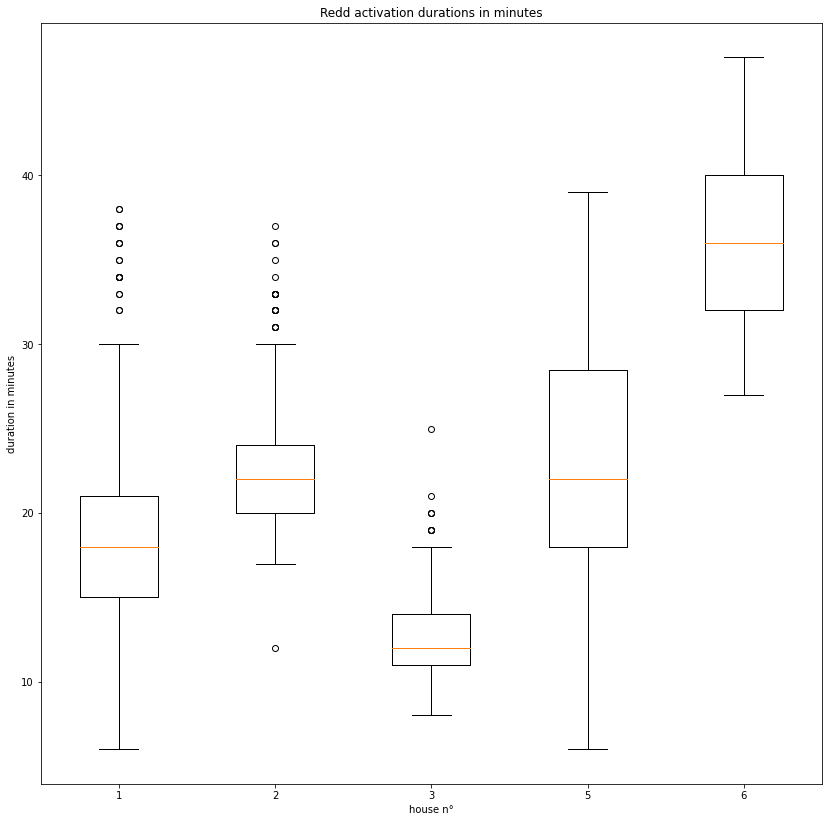

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd activation durations in minutes')
ax7.boxplot(normal_duration)
#ax7.set_ylim(0,200)
ax7.set_xticklabels(Redd_min_durations.keys())
plt.savefig('Redd activation durations in minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

House1number of normal activations:550number of anomalies92
House2number of normal activations:303number of anomalies52
House3number of normal activations:571number of anomalies138
House5number of normal activations:76number of anomalies12
House6number of normal activations:221number of anomalies49


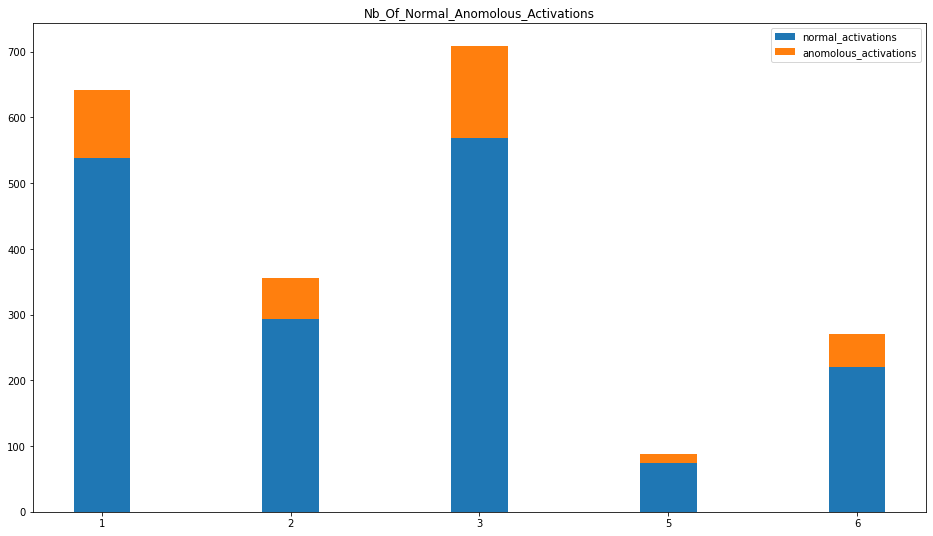

In [ ]:
nb_normal_activations=[]
nb_anomolous_activations=[]
for i in [1,2,3,5,6]:
    nb_normal_activations.append(len(redd_activations_normal_consumption_duration[i]))
    nb_anomolous_activations.append(len(redd_activations_abnormal_consumption_duration[i]))
    print("House"+str(i)+"number of normal activations:"+str(len(redd_activations_normal_consumption[i]))+"number of anomalies"+str(len(redd_activations_abnormal_consumption[i])))
fig, ax = plt.subplots(figsize =(16, 9))
width =0.3
y_pos = np.arange(5)
ax.bar(np.arange(len(nb_normal_activations)), nb_normal_activations, width=width,label='normal_activations')
ax.bar(np.arange(len(nb_anomolous_activations)), nb_anomolous_activations,bottom=nb_normal_activations, width=width,label="anomolous_activations")
plt.xticks(y_pos, [1,2,3,5,6])
plt.title('Nb_Of_Normal_Anomolous_Activations')
plt.legend()
plt.show()